In [205]:
# conda create -n pi_env python=3.9
# conda activate pi_env
# pip install pandas
# pip install seaborn
# pip install matplotlib
# pip install fastparquet
# pip install scipy
# pip install scikit-learn

## Librerías

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

In [67]:
# Option 1: Using pandas display options
pd.options.display.float_format = '{:.6f}'.format  # Display up to 6 decimal places

Importar la base de datos

In [68]:
data_raw = pd.read_parquet(r"Data_Ca_Mama.parquet", engine='fastparquet')
data_raw.head()

,Afiliado_Id,Ind_Frecuencia_Licor,Sexo_Cd,Raza_Desc,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Ind_Terapia_Hormonal,Num_Birads,Ind_Ooforectomia_Bilateral,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Ind_Ant_Fam_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM,Ind_Ant_Fam_CAM,Ind_Ant_Radio_Torax,Edad,Ind_CAM
0,6915312.000000,None,F,SIN INFORMACION DESDE LA FUENTE,29.010000,NaN,13.000000,No,None,No,0.000000,0.000000,No,0.000000,0.000000,No,No,34.000000,No
1,1520483.000000,None,F,MESTIZO,NaN,NaN,14.000000,No,None,No,0.000000,0.000000,No,0.000000,0.000000,No,No,40.000000,No
2,10964151.000000,Si,F,SIN INFORMACION DESDE LA FUENTE,33.010000,NaN,NaN,No,None,No,0.000000,0.000000,No,0.000000,0.000000,No,Si,41.000000,No
3,10814984.000000,No,F,SIN INFORMACION DESDE LA FUENTE,23.340000,NaN,NaN,No,None,No,0.000000,0.000000,No,0.000000,0.000000,No,No,25.000000,No
4,1301025.000000,No,F,MESTIZO,24.670000,NaN,9.000000,No,1,No,0.000000,0.000000,No,0.000000,0.000000,No,No,61.000000,No


# Comprensión de los datos

In [69]:
# Revisar las variables que están en el DataFrame
data_raw.columns

Index(['Afiliado_Id', 'Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc',
       'Valor_IMC', 'Num_Edad_Menopausia', 'Num_Edad_Menarca',
       'Ind_Terapia_Hormonal', 'Num_Birads', 'Ind_Ooforectomia_Bilateral',
       'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Ind_Ant_Fam_Otros', 'Num_Fam_Primer_Grado_CAM',
       'Num_Fam_Segundo_Grado_CAM', 'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax',
       'Edad', 'Ind_CAM'],
      dtype='object')

In [70]:
data_raw.shape

(2190279, 19)

Se tiene un total de 2.190.279 registros con 19 variables.

In [71]:
# Cantidad de registros por población sana y enferma
data_raw.Ind_CAM.value_counts()

Ind_CAM
No    2172026
Si      18253
Name: count, dtype: int64

- Casos positivos: 18.253 mujeres afiliadas con diagnóstico positivo de cáncer de mama.
- Casos negativos: 2.172.026 mujeres sin diagnóstico de cáncer de mama.

## Calidad de los datos

### Duplicidad

In [72]:
# Contar el número de filas duplicadas
num_duplicated = data_raw.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicated}")

Número de filas duplicadas: 66


In [73]:
# Eliminar registros duplicados
data_raw = data_raw.drop_duplicates()

### Completitud

In [74]:
# Calcular el porcentaje de valores faltantes por columna
missing_percentage = data_raw.isnull().mean() * 100
print('Porcentaje de valores faltantes por columna:')
missing_percentage[missing_percentage > 0]

Porcentaje de valores faltantes por columna:


Ind_Frecuencia_Licor   33.812876
Valor_IMC              11.055957
Num_Edad_Menopausia    98.576075
Num_Edad_Menarca       59.428238
Num_Birads             77.865304
dtype: float64

In [75]:
data_raw.Edad.describe()

count   2190213.000000
mean         43.159533
std          16.741093
min          18.000000
25%          29.000000
50%          40.000000
75%          55.000000
max         139.000000
Name: Edad, dtype: float64

Se puede apreciar que 98,58% de los registros de la variable edad de menopausia se encuentra vacío. Sin embargo, dado que el 75% de las mujeres en el dataset tienen una edad igual o inferior a los 55 años, el registro es coherente ya que la menopausia es un proceso natural que suele ocurrir entre los 45 y 55 años de edad, aunque la edad promedio es de 51 años.

In [76]:
data_raw[data_raw.Edad > 50].isnull().mean() * 100

Afiliado_Id                    0.000000
Ind_Frecuencia_Licor          29.759105
Sexo_Cd                        0.000000
Raza_Desc                      0.000000
Valor_IMC                      9.260842
Num_Edad_Menopausia           95.583001
Num_Edad_Menarca              50.295785
Ind_Terapia_Hormonal           0.000000
Num_Birads                    54.927411
Ind_Ooforectomia_Bilateral     0.000000
Num_Fam_Primer_Grado_Otros     0.000000
Num_Fam_Segundo_Grado_Otros    0.000000
Ind_Ant_Fam_Otros              0.000000
Num_Fam_Primer_Grado_CAM       0.000000
Num_Fam_Segundo_Grado_CAM      0.000000
Ind_Ant_Fam_CAM                0.000000
Ind_Ant_Radio_Torax            0.000000
Edad                           0.000000
Ind_CAM                        0.000000
dtype: float64

### Conformidad

In [77]:
# Revisión general del tipo de datos
data_raw.dtypes

Afiliado_Id                    float64
Ind_Frecuencia_Licor            object
Sexo_Cd                         object
Raza_Desc                       object
Valor_IMC                      float64
Num_Edad_Menopausia            float64
Num_Edad_Menarca               float64
Ind_Terapia_Hormonal            object
Num_Birads                      object
Ind_Ooforectomia_Bilateral      object
Num_Fam_Primer_Grado_Otros     float64
Num_Fam_Segundo_Grado_Otros    float64
Ind_Ant_Fam_Otros               object
Num_Fam_Primer_Grado_CAM       float64
Num_Fam_Segundo_Grado_CAM      float64
Ind_Ant_Fam_CAM                 object
Ind_Ant_Radio_Torax             object
Edad                           float64
Ind_CAM                         object
dtype: object

In [78]:
data_raw.Afiliado_Id = data_raw.Afiliado_Id.astype('int')
data_raw.Num_Edad_Menarca = data_raw.Num_Edad_Menarca.astype('int', errors= 'ignore')
data_raw.Num_Edad_Menopausia = data_raw.Num_Edad_Menopausia.astype('int', errors= 'ignore')
data_raw.Num_Fam_Primer_Grado_Otros = data_raw.Num_Fam_Primer_Grado_Otros.astype('int', errors= 'ignore')
data_raw.Num_Fam_Segundo_Grado_Otros = data_raw.Num_Fam_Segundo_Grado_Otros.astype('int', errors= 'ignore')
data_raw.Num_Fam_Primer_Grado_CAM = data_raw.Num_Fam_Primer_Grado_CAM.astype('int', errors= 'ignore')
data_raw.Num_Fam_Segundo_Grado_CAM = data_raw.Num_Fam_Segundo_Grado_CAM.astype('int', errors= 'ignore')
data_raw.Edad = data_raw.Edad.astype('int', errors= 'ignore')

Se decide cambiar los datos numericos de float64 a int, exceptuando el Valor de IMC.

Lo siguiente, sería analizar que las categorías de las variables categorícas se encuentren bien.

In [79]:
for column in data_raw.select_dtypes(include=['object']):
    print(f"Categorías en la columna {column}:")
    print(data_raw[column].unique())

Categorías en la columna Ind_Frecuencia_Licor:
[None 'Si' 'No']
Categorías en la columna Sexo_Cd:
['F']
Categorías en la columna Raza_Desc:
['SIN INFORMACION DESDE LA FUENTE' 'MESTIZO' 'BLANCO' 'AFROAMERICANO'
 'MULATO' 'ZAMBO' 'INDÍGENA']
Categorías en la columna Ind_Terapia_Hormonal:
['No' 'Si']
Categorías en la columna Num_Birads:
[None '1' 'BIRA' '2' '0' '4' '3' '6' 'BI-R' 'BI R' 'CATE' '5' 'BI -'
 'CLAS']
Categorías en la columna Ind_Ooforectomia_Bilateral:
['No' 'Si']
Categorías en la columna Ind_Ant_Fam_Otros:
['No' 'Si']
Categorías en la columna Ind_Ant_Fam_CAM:
['No' 'Si']
Categorías en la columna Ind_Ant_Radio_Torax:
['No' 'Si']
Categorías en la columna Ind_CAM:
['No' 'Si']


En general, las categorías de las variables categoricas se encuentran bien. Para la variable raza se encuentra la categoría 'SIN INFORMACION DESDE LA FUENTE' la cual debe ser eliminada ya que no corresponde a una categoría permitida. Por otro lado, en la variable Num_Birads también se encuentran categorías no permitidas como: 'BIRA', 'BI-R', 'BI R', 'CATE', 'BI -', 'CLAS'. Se decide limpiar estas categorías en los registros que aparecen.

In [80]:
# Función para verificar si un valor de BI-RADS es válido
def es_birads_valido(valor):
    try:
        valor_int = int(valor)
        return 0 <= valor_int <= 6
    except:
        return False

In [81]:
# Aplicar la función a la columna y reemplazar los valores no válidos por Na
data_raw['Num_Birads'] = data_raw['Num_Birads'].apply(lambda x: x if es_birads_valido(x) else np.nan)

In [82]:
# Aplicar la función a la columna y reemplazar los valores no válidos por Na
data_raw.Raza_Desc = data_raw.Raza_Desc.replace('SIN INFORMACION DESDE LA FUENTE', np.nan)

In [83]:
for column in data_raw.select_dtypes(include=['object']):
    print(f"Categorías en la columna {column}:")
    print(data_raw[column].unique())

Categorías en la columna Ind_Frecuencia_Licor:
[None 'Si' 'No']
Categorías en la columna Sexo_Cd:
['F']
Categorías en la columna Raza_Desc:
[nan 'MESTIZO' 'BLANCO' 'AFROAMERICANO' 'MULATO' 'ZAMBO' 'INDÍGENA']
Categorías en la columna Ind_Terapia_Hormonal:
['No' 'Si']
Categorías en la columna Num_Birads:
[nan '1' '2' '0' '4' '3' '6' '5']
Categorías en la columna Ind_Ooforectomia_Bilateral:
['No' 'Si']
Categorías en la columna Ind_Ant_Fam_Otros:
['No' 'Si']
Categorías en la columna Ind_Ant_Fam_CAM:
['No' 'Si']
Categorías en la columna Ind_Ant_Radio_Torax:
['No' 'Si']
Categorías en la columna Ind_CAM:
['No' 'Si']


Ahora, se analiza que la edad de la menopausia sea mayor que la edad de la menarca.

In [84]:
# Edad de menarca debe ser menor que edad de menopausia
edad_inconsistente = data_raw[data_raw['Num_Edad_Menopausia'] <= data_raw['Num_Edad_Menarca']]
print(f"Registros con inconsistencia en edades de menarca y menopausia: {len(edad_inconsistente)}")

Registros con inconsistencia en edades de menarca y menopausia: 0


In [85]:
# Edad de menarca debe ser menor que edad de menopausia
edad_inconsistente = data_raw[data_raw['Edad'] <= data_raw['Num_Edad_Menarca']]
print(f"Registros con inconsistencia en edades de menarca y edad: {len(edad_inconsistente)}")

Registros con inconsistencia en edades de menarca y edad: 0


In [86]:
# Edad de menarca debe ser menor que edad de menopausia
edad_inconsistente = data_raw[data_raw['Edad'] < data_raw['Num_Edad_Menopausia']]
print(f"Registros con inconsistencia en edades de menopausia y edad: {len(edad_inconsistente)}")

Registros con inconsistencia en edades de menopausia y edad: 3


In [87]:
condicion_inconsistente = data_raw['Num_Edad_Menopausia'] > data_raw['Edad']

In [88]:
# Invertir la condición para obtener los registros consistentes
data_raw = data_raw[~condicion_inconsistente]
data_raw.shape

(2190210, 19)

### Precisión

Verificar si los datos son correctos y representan fielmente la realidad.

In [89]:
for column in data_raw.select_dtypes(include=['float64', 'int']):
    print(f"Categorías en la columna {column}:")
    print(data_raw[column].unique())

Categorías en la columna Afiliado_Id:
[ 6915312  1520483 10964151 ...  1274761  4612105  1423928]
Categorías en la columna Valor_IMC:
[29.01               nan 33.01       ... 29.93056859 51.48
 39.17092768]
Categorías en la columna Num_Edad_Menopausia:
[nan 50. 56. 52. 53. 45. 48. 39. 37. 51. 55. 46. 38. 40. 54. 47. 49. 36.
 44. 43. 41. 57. 42.]
Categorías en la columna Num_Edad_Menarca:
[13. 14. nan  9. 12. 15. 11. 10. 16. 17.]
Categorías en la columna Num_Fam_Primer_Grado_Otros:
[0 1 2 3 4]
Categorías en la columna Num_Fam_Segundo_Grado_Otros:
[0 1 2 3]
Categorías en la columna Num_Fam_Primer_Grado_CAM:
[0 1 2]
Categorías en la columna Num_Fam_Segundo_Grado_CAM:
[0 1 2]
Categorías en la columna Edad:
[ 34  40  41  25  61  86  60  24  32  78  30  51  26  74  58  47  55  23
  35  50  39  73  27  29  18  68  67  54  63  21  37  84  53  20  59  43
  56  64  36  31  52  38  79  48  83  62  33  44  65  45  28  93  19  81
  42  57  22  49  66  46  69  95  71  77  82  72  80  75  70  76  88 

In [90]:
# Edad de menarca improbable
edad_menarca_improbable = data_raw[(data_raw['Num_Edad_Menarca'] < 8) | (data_raw['Num_Edad_Menarca'] > 18)]
print(f"Registros con edad de menarca improbable: {len(edad_menarca_improbable)}")

Registros con edad de menarca improbable: 0


In [91]:
# Edad de menopausia improbable
edad_menopausia_improbable = data_raw[(data_raw['Num_Edad_Menopausia'] < 35)]
print(f"Registros con edad de menarca improbable: {len(edad_menopausia_improbable)}")

Registros con edad de menarca improbable: 0


### Consistencia

Verificar que en los casos donde el número de familiares es diferente de 0 o None (es decir, hay al menos un familiar afectado), el indicador correspondiente sea Si, y en caso contrario, sea No.

In [92]:
# Calcular el total de familiares con otros cánceres
data_raw['Total_Fam_Otros'] = data_raw['Num_Fam_Primer_Grado_Otros'].fillna(0) + data_raw['Num_Fam_Segundo_Grado_Otros'].fillna(0)

# Generar el indicador esperado: 1 si Total_Fam_Otros > 0, 0 si no
data_raw['Ind_Ant_Fam_Otros_Esperado'] = data_raw['Total_Fam_Otros'].apply(lambda x: 'Si' if x > 0 else 'No')

In [93]:
# Crear una columna que indique si hay discrepancia
data_raw['Discrepancia_Otros'] = data_raw['Ind_Ant_Fam_Otros'] != data_raw['Ind_Ant_Fam_Otros_Esperado']

# Identificar registros con discrepancias
discrepancias_otros = data_raw[data_raw['Discrepancia_Otros'] == True]

print(f"Número de registros con discrepancias en 'Ind_Ant_Fam_Otros': {len(discrepancias_otros)}")

Número de registros con discrepancias en 'Ind_Ant_Fam_Otros': 82192


In [94]:
discrepancias_otros.columns

Index(['Afiliado_Id', 'Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc',
       'Valor_IMC', 'Num_Edad_Menopausia', 'Num_Edad_Menarca',
       'Ind_Terapia_Hormonal', 'Num_Birads', 'Ind_Ooforectomia_Bilateral',
       'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Ind_Ant_Fam_Otros', 'Num_Fam_Primer_Grado_CAM',
       'Num_Fam_Segundo_Grado_CAM', 'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax',
       'Edad', 'Ind_CAM', 'Total_Fam_Otros', 'Ind_Ant_Fam_Otros_Esperado',
       'Discrepancia_Otros'],
      dtype='object')

In [95]:
discrepancias_otros.loc[:,['Afiliado_Id','Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Ind_Ant_Fam_Otros' , 'Total_Fam_Otros', 'Ind_Ant_Fam_Otros_Esperado',
       'Discrepancia_Otros']].Ind_Ant_Fam_Otros.value_counts()

Ind_Ant_Fam_Otros
No    82192
Name: count, dtype: int64

Dado que todos los valores donde hay discrepancia con la variable original son "No", se decide eliminar la variable Ind_Ant_Fam_Otros y reemplazarla por la variable nueva llamada Ind_Ant_Fam_Otros_Esperado

Se repite el mismo proceso para la variable de CA Mama

In [96]:
# Calcular el total de familiares con otros cánceres
data_raw['Total_Fam_CAM'] = data_raw['Num_Fam_Primer_Grado_CAM'].fillna(0) + data_raw['Num_Fam_Segundo_Grado_CAM'].fillna(0)

# Generar el indicador esperado: 1 si Total_Fam_Otros > 0, 0 si no
data_raw['Ind_Ant_Fam_CAM_Esperado'] = data_raw['Total_Fam_CAM'].apply(lambda x: 'Si' if x > 0 else 'No')

In [97]:
# Crear una columna que indique si hay discrepancia
data_raw['Discrepancia_CAM'] = data_raw['Ind_Ant_Fam_CAM'] != data_raw['Ind_Ant_Fam_CAM_Esperado']

# Identificar registros con discrepancias
discrepancias_CAM = data_raw[data_raw['Discrepancia_CAM'] == True]

print(f"Número de registros con discrepancias en 'Ind_Ant_Fam_CAM': {len(discrepancias_CAM)}")

Número de registros con discrepancias en 'Ind_Ant_Fam_CAM': 0


No se encontraron discrepancias en esta variable.

In [98]:
# Eliminar columnas temporales
columnas_eliminar = ['Ind_Ant_Fam_Otros', 'Total_Fam_Otros', 'Discrepancia_Otros',
                      'Total_Fam_CAM', 'Ind_Ant_Fam_CAM_Esperado', 'Discrepancia_CAM'
                      ]

data_raw = data_raw.drop(columnas_eliminar, axis=1)

In [99]:
data_raw

,Afiliado_Id,Ind_Frecuencia_Licor,Sexo_Cd,Raza_Desc,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Ind_Terapia_Hormonal,Num_Birads,Ind_Ooforectomia_Bilateral,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM,Ind_Ant_Fam_CAM,Ind_Ant_Radio_Torax,Edad,Ind_CAM,Ind_Ant_Fam_Otros_Esperado
0,6915312,None,F,NaN,29.010000,NaN,13.000000,No,NaN,No,0,0,0,0,No,No,34,No,No
1,1520483,None,F,MESTIZO,NaN,NaN,14.000000,No,NaN,No,0,0,0,0,No,No,40,No,No
2,10964151,Si,F,NaN,33.010000,NaN,NaN,No,NaN,No,0,0,0,0,No,Si,41,No,No
3,10814984,No,F,NaN,23.340000,NaN,NaN,No,NaN,No,0,0,0,0,No,No,25,No,No
4,1301025,No,F,MESTIZO,24.670000,NaN,9.000000,No,1,No,0,0,0,0,No,No,61,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190274,278615,Si,F,NaN,24.767566,NaN,NaN,No,NaN,No,0,0,0,0,No,No,22,No,No
2190275,6455230,No,F,MESTIZO,29.300000,NaN,NaN,No,1,No,0,0,0,0,No,No,28,No,No
2190276,1274761,No,F,MESTIZO,24.300734,NaN,12.000000,No,1,No,1,1,0,0,No,Si,70,No,Si
2190277,4612105,No,F,MESTIZO,NaN,NaN,12.000000,No,NaN,No,0,0,0,0,No,Si,38,No,No


## EDA

In [100]:
# Convertir variables categóricas a tipo 'category' para optimizar memoria y facilitar análisis
categorical_vars = ['Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc', 'Ind_Terapia_Hormonal',
                    'Num_Birads', 'Ind_Ooforectomia_Bilateral', 'Ind_Ant_Fam_CAM',
                    'Ind_Ant_Radio_Torax', 'Ind_CAM', 'Ind_Ant_Fam_Otros_Esperado']

for var in categorical_vars:
    data_raw[var] = data_raw[var].astype('category')

### **Análisis Univariado**

Analiza cada variable individualmente para entender su distribución y características.

#### Variables númericas

In [101]:
numerical_vars = ['Valor_IMC', 'Num_Edad_Menopausia', 'Num_Edad_Menarca', 'Edad',
                  'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
                  'Num_Fam_Primer_Grado_CAM', 'Num_Fam_Segundo_Grado_CAM']

# Resumen estadístico
data_raw[numerical_vars].describe()

,Valor_IMC,Num_Edad_Menopausia,Num_Edad_Menarca,Edad,Num_Fam_Primer_Grado_Otros,Num_Fam_Segundo_Grado_Otros,Num_Fam_Primer_Grado_CAM,Num_Fam_Segundo_Grado_CAM
count,1948063.000000,31184.000000,888606.000000,2190210.000000,2190210.000000,2190210.000000,2190210.000000,2190210.000000
mean,26.632020,47.651360,11.046907,43.159532,0.052784,0.047167,0.002419,0.001418
std,4.907999,4.585369,2.065677,16.741103,0.254169,0.230054,0.049989,0.038364
min,13.000000,36.000000,9.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,23.310000,45.000000,9.000000,29.000000,0.000000,0.000000,0.000000,0.000000
50%,25.964542,48.000000,11.000000,40.000000,0.000000,0.000000,0.000000,0.000000
75%,29.296875,51.000000,13.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,89.970000,57.000000,17.000000,139.000000,4.000000,3.000000,2.000000,2.000000


In [102]:
def analisis_univariado_num(df, variable):
    """
    Analiza una variable numérica, mostrando:
    1. Tabla con estadísticas descriptivas (describe())
    2. Gráfico de dispersión (scatterplot) frente a su índice
    3. Boxplot de la variable
    4. Número de outliers

    Args:
    - df: DataFrame con los datos
    - variable: Nombre de la variable numérica a analizar (str)
    """
    # Verificar si la variable existe en el DataFrame
    if variable not in df.columns:
        print(f"La variable '{variable}' no está en el DataFrame.")
        return

    # Tabla de estadísticas descriptivas
    print(f"Estadísticas descriptivas para '{variable}':")
    print(df[variable].describe())
    print("\n")

    # Calcular percentiles para identificar outliers
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    print(f'Número de outliers en {variable}: {len(outliers)}')
    print("\n")

    # Calcular la media y la mediana
    mean_value = df[variable].mean()
    median_value = df[variable].median()

    # Crear la figura con dos gráficos: dispersión y boxplot
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    # Histograma con curva KDE
    sns.histplot(df[variable].dropna(), kde=True, bins=30, ax=axes[0], color="skyblue")
    axes[0].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
    axes[0].axvline(median_value, color='green', linestyle='dotted', linewidth=2, label=f'Mediana: {median_value:.2f}')
    axes[0].set_title(f'Histograma de {variable} con Media y Mediana')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Frecuencia')
    axes[0].legend()

    # Boxplot
    sns.boxplot(x=df[variable], ax=axes[1], color="lightblue")
    axes[1].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
    axes[1].set_title(f'Boxplot para {variable}')
    axes[1].set_xlabel(variable)
    axes[1].legend()

    # Ajustar diseño
    plt.tight_layout()
    plt.show()


Estadísticas descriptivas para 'Valor_IMC':
count   1948063.000000
mean         26.632020
std           4.907999
min          13.000000
25%          23.310000
50%          25.964542
75%          29.296875
max          89.970000
Name: Valor_IMC, dtype: float64


Número de outliers en Valor_IMC: 46141




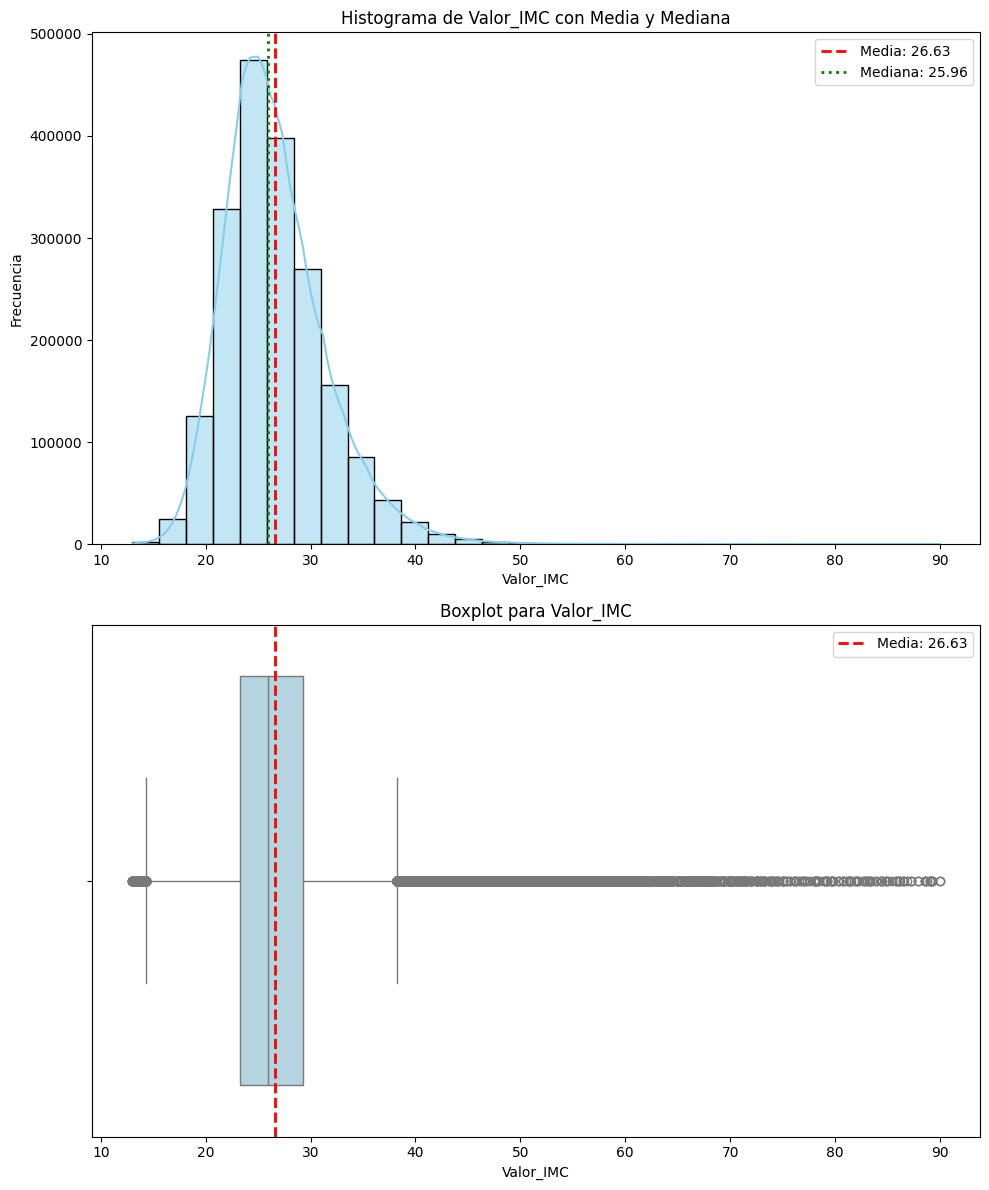

Estadísticas descriptivas para 'Num_Edad_Menopausia':
count   31184.000000
mean       47.651360
std         4.585369
min        36.000000
25%        45.000000
50%        48.000000
75%        51.000000
max        57.000000
Name: Num_Edad_Menopausia, dtype: float64


Número de outliers en Num_Edad_Menopausia: 0




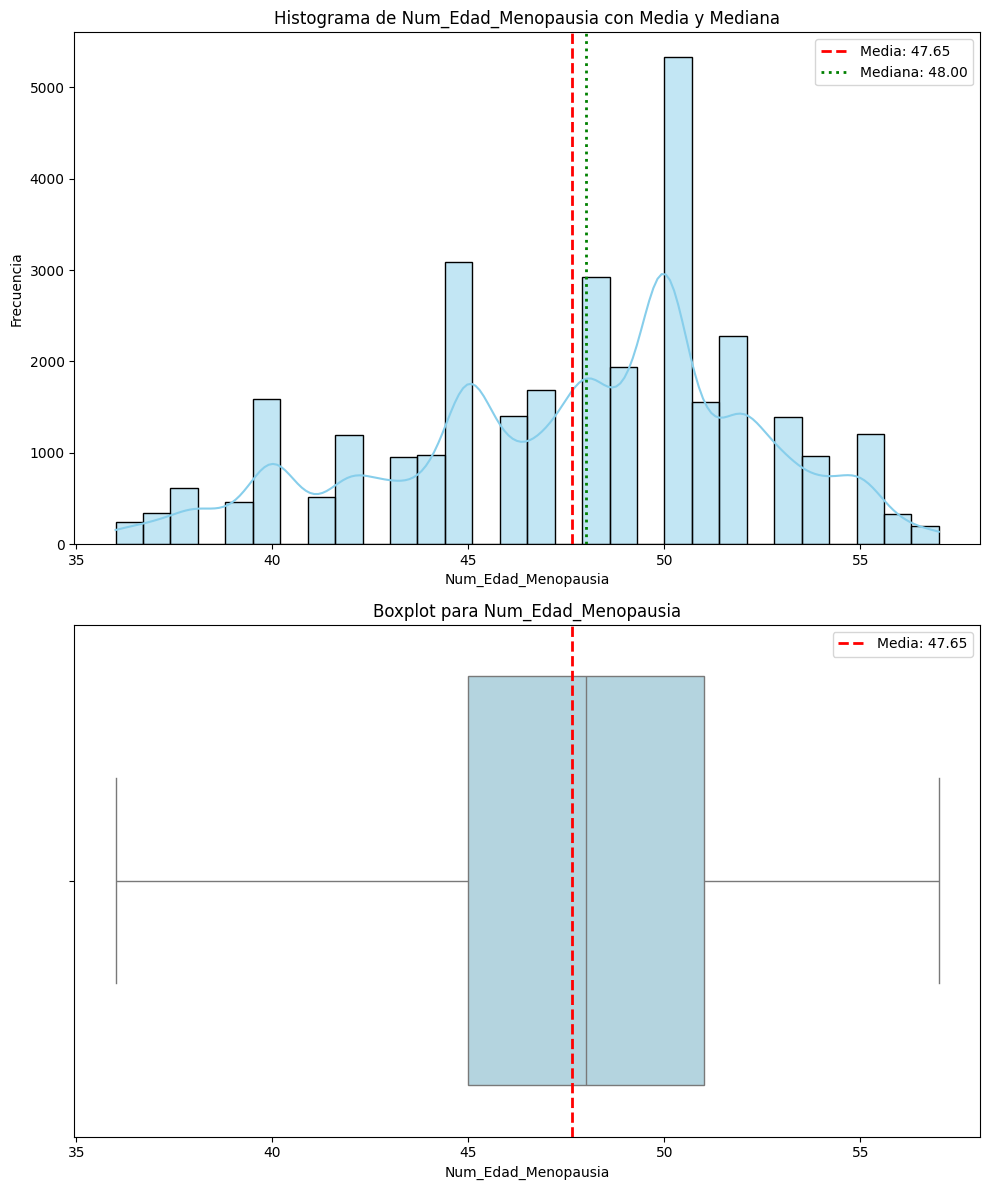

Estadísticas descriptivas para 'Num_Edad_Menarca':
count   888606.000000
mean        11.046907
std          2.065677
min          9.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         17.000000
Name: Num_Edad_Menarca, dtype: float64


Número de outliers en Num_Edad_Menarca: 0




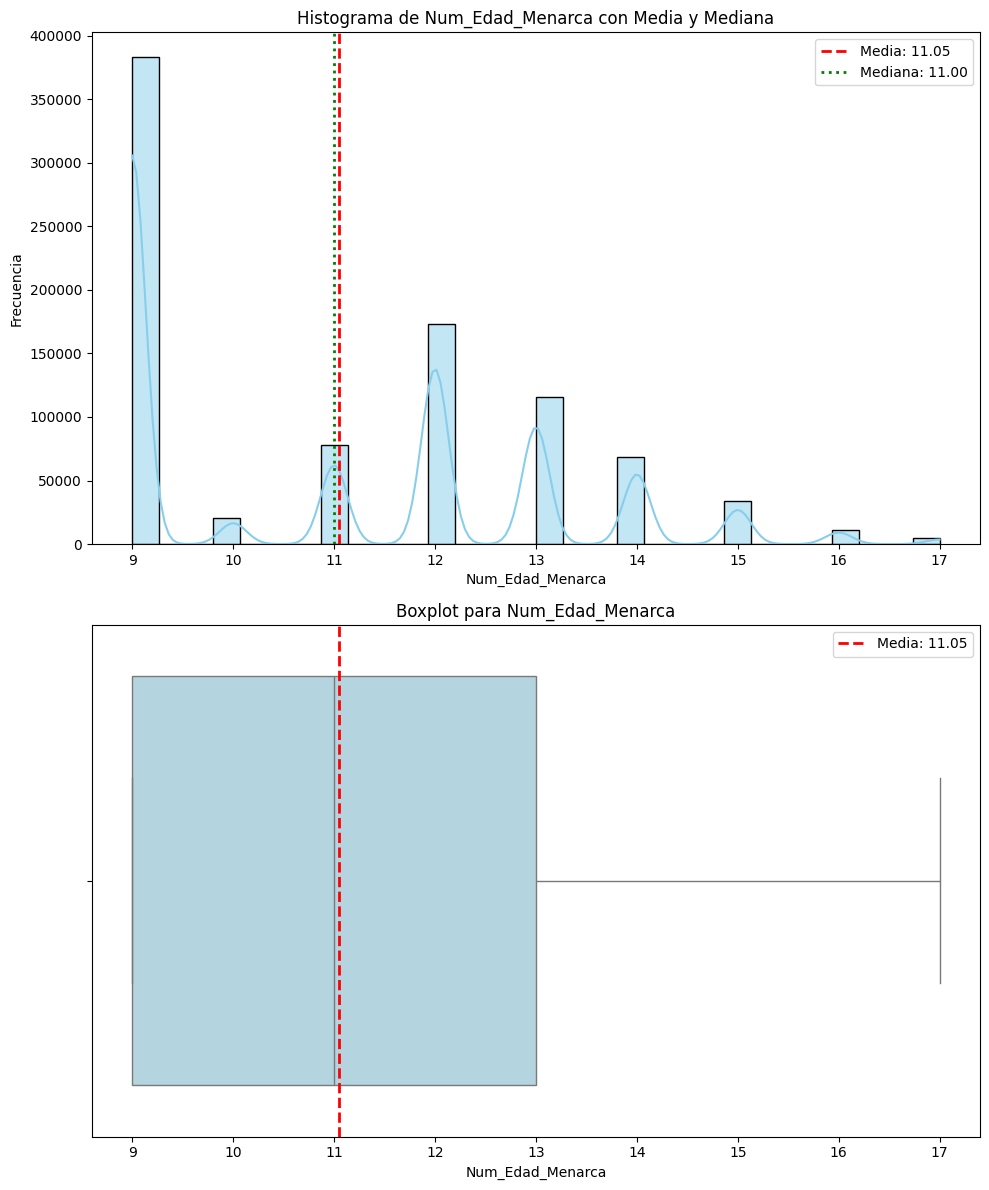

Estadísticas descriptivas para 'Edad':
count   2190210.000000
mean         43.159532
std          16.741103
min          18.000000
25%          29.000000
50%          40.000000
75%          55.000000
max         139.000000
Name: Edad, dtype: float64


Número de outliers en Edad: 2942




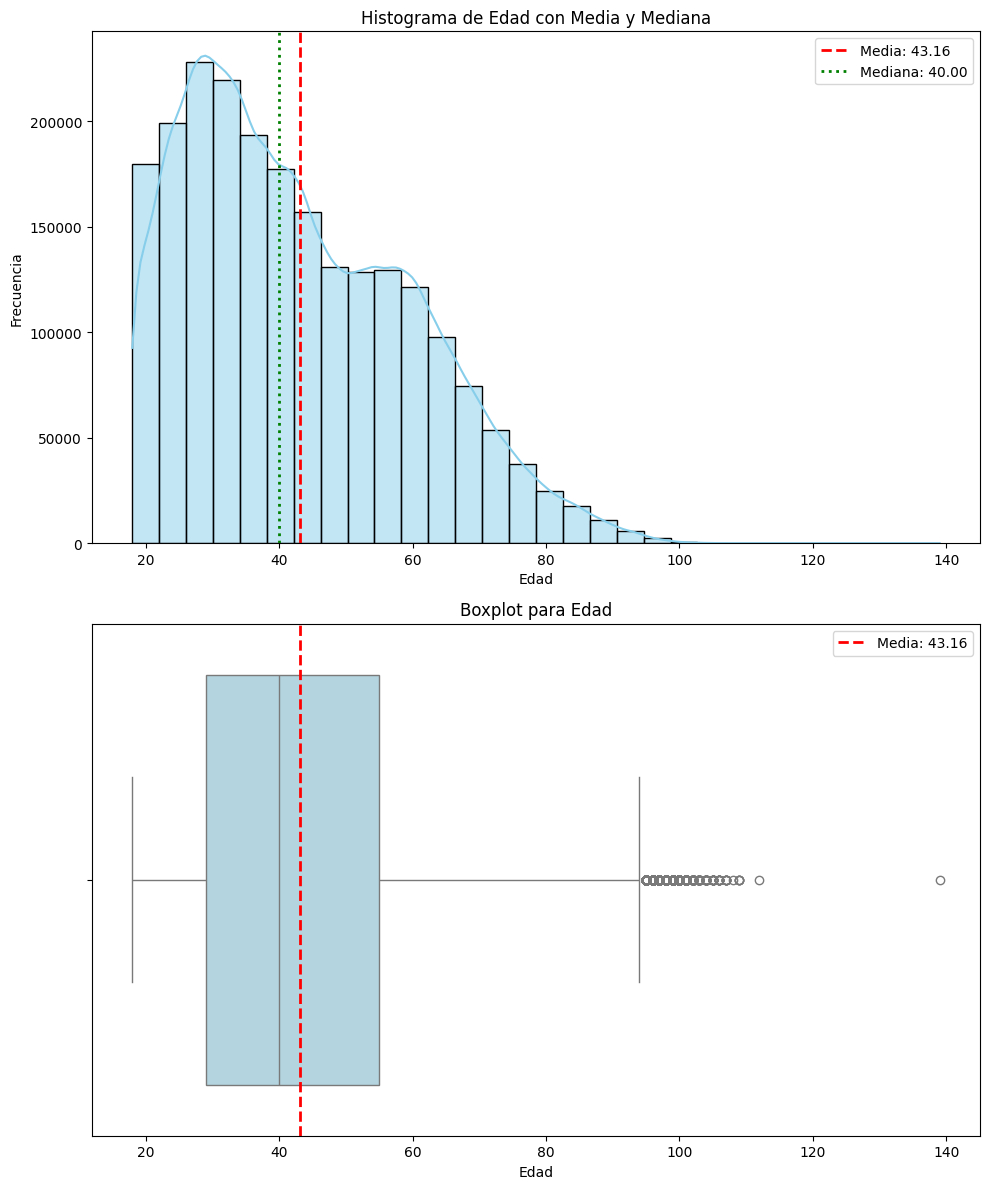

Estadísticas descriptivas para 'Num_Fam_Primer_Grado_Otros':
count   2190210.000000
mean          0.052784
std           0.254169
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Num_Fam_Primer_Grado_Otros, dtype: float64


Número de outliers en Num_Fam_Primer_Grado_Otros: 101031




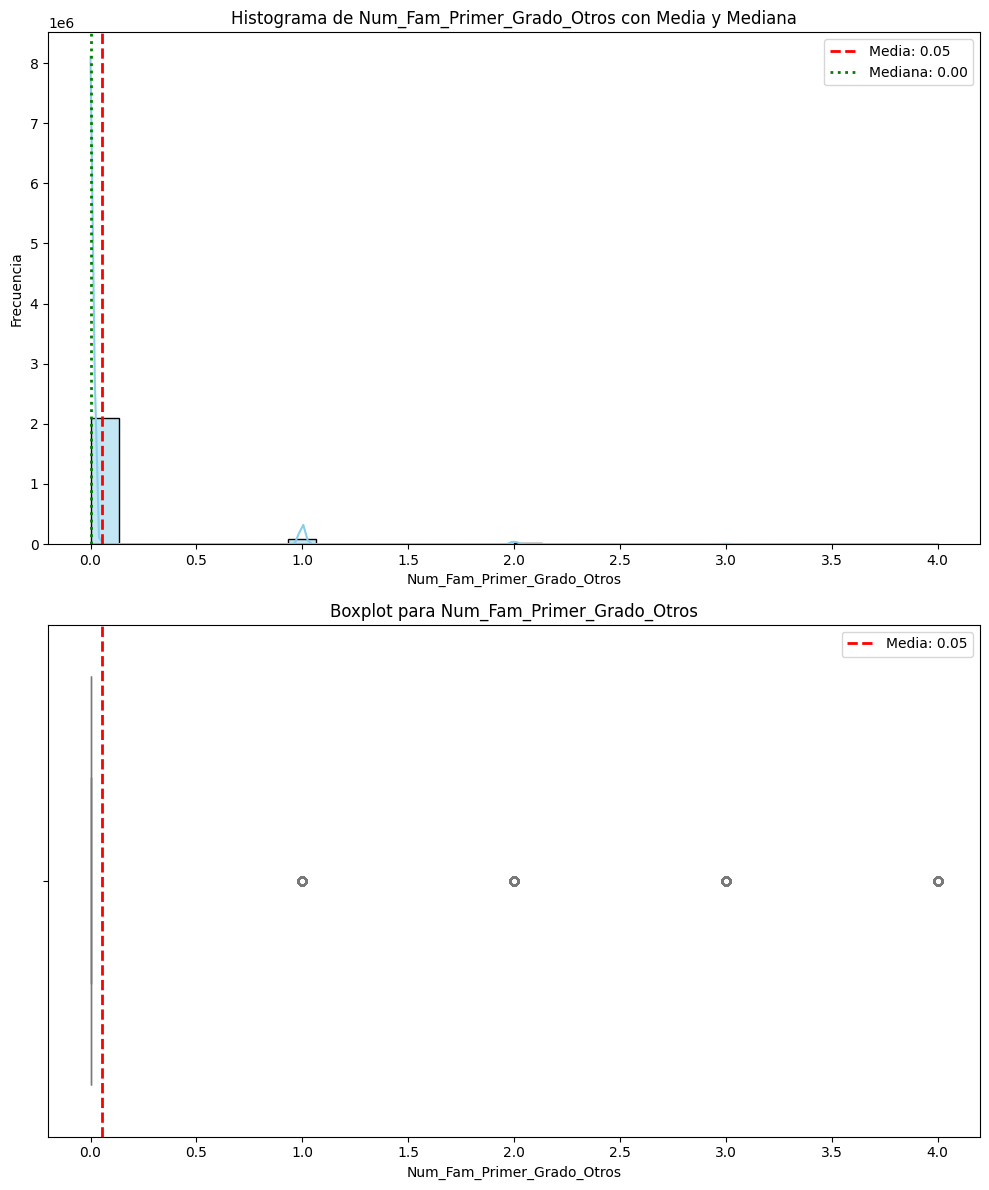

Estadísticas descriptivas para 'Num_Fam_Segundo_Grado_Otros':
count   2190210.000000
mean          0.047167
std           0.230054
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: Num_Fam_Segundo_Grado_Otros, dtype: float64


Número de outliers en Num_Fam_Segundo_Grado_Otros: 94850




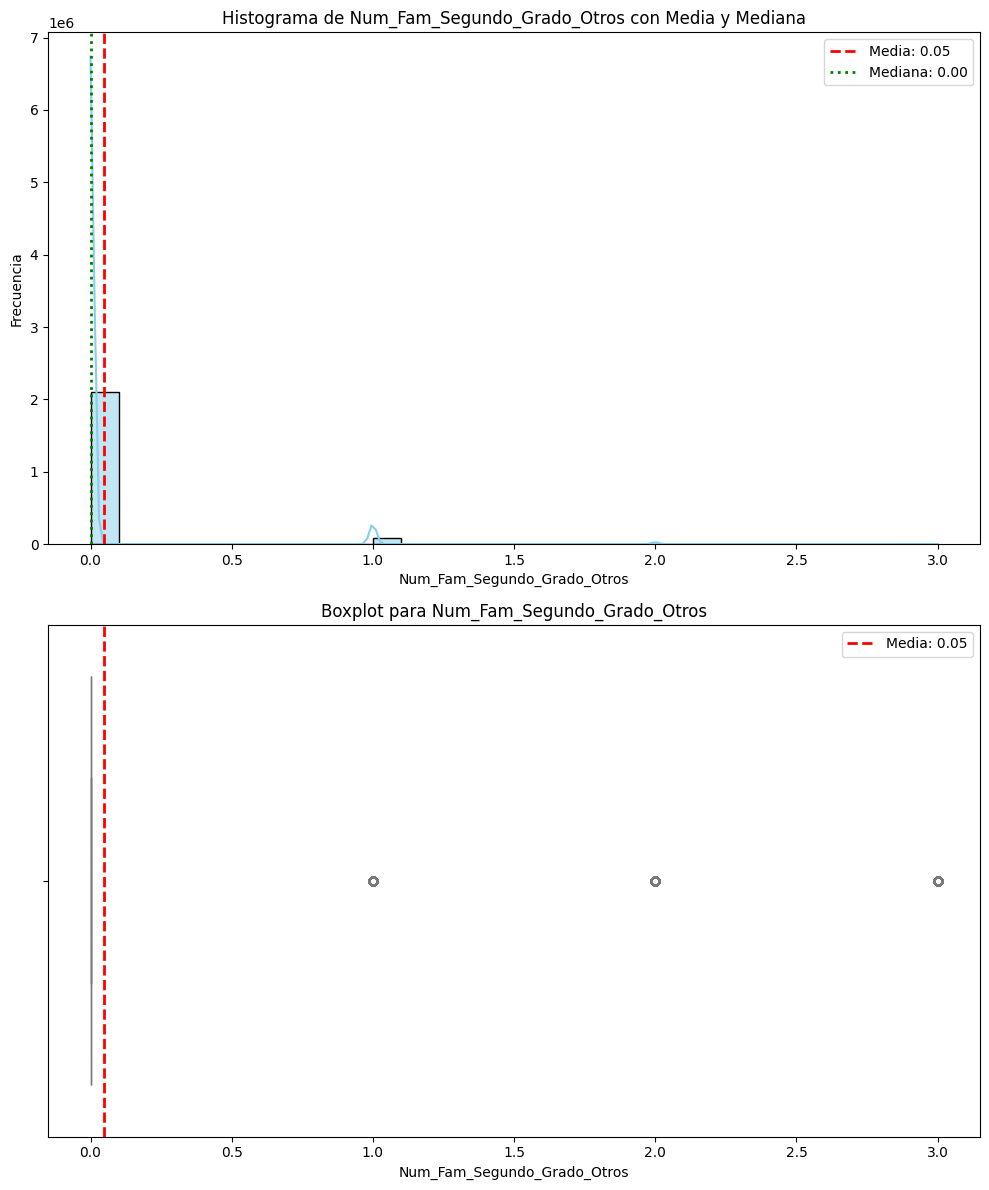

Estadísticas descriptivas para 'Num_Fam_Primer_Grado_CAM':
count   2190210.000000
mean          0.002419
std           0.049989
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Num_Fam_Primer_Grado_CAM, dtype: float64


Número de outliers en Num_Fam_Primer_Grado_CAM: 5204




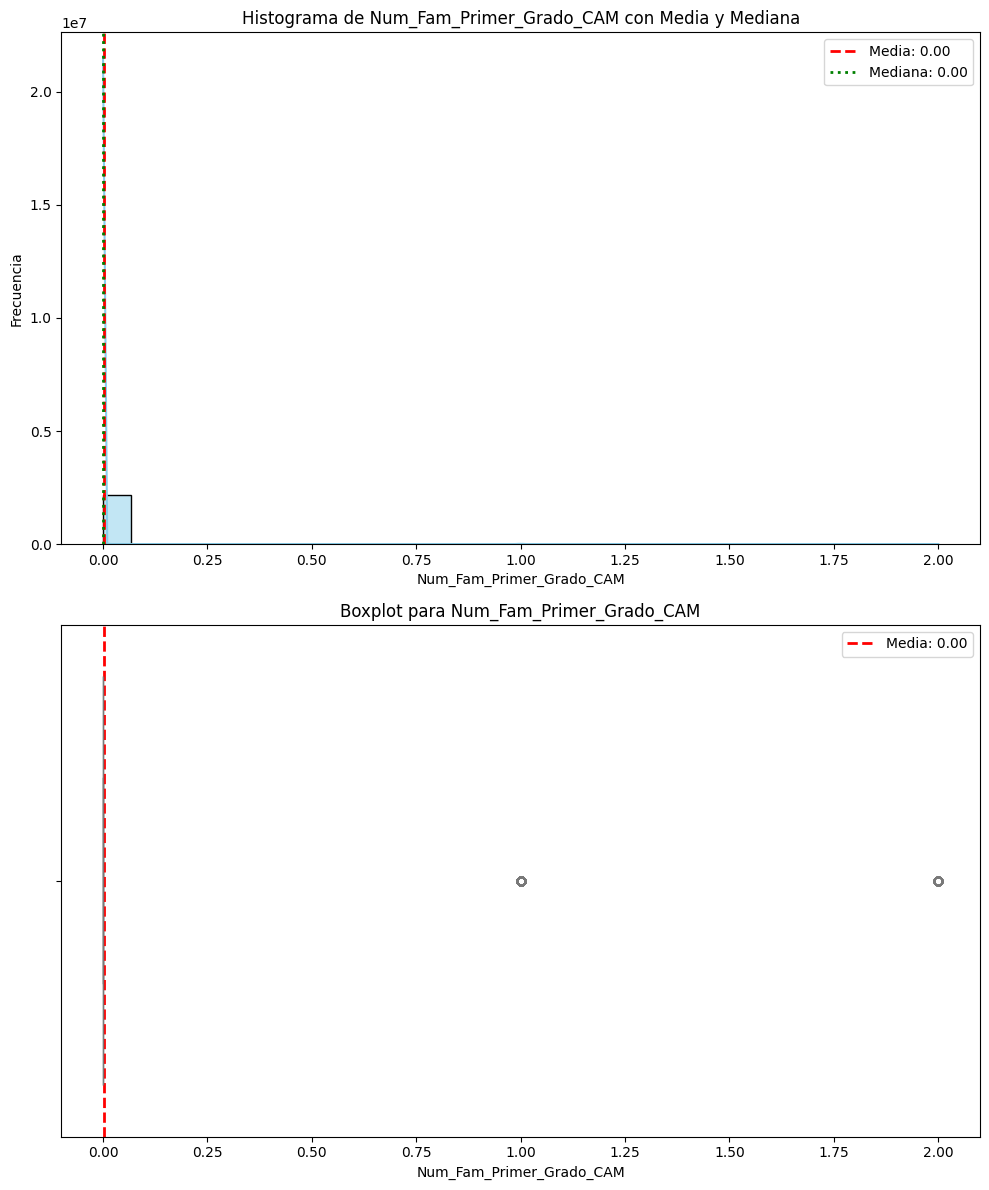

Estadísticas descriptivas para 'Num_Fam_Segundo_Grado_CAM':
count   2190210.000000
mean          0.001418
std           0.038364
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Num_Fam_Segundo_Grado_CAM, dtype: float64


Número de outliers en Num_Fam_Segundo_Grado_CAM: 3045




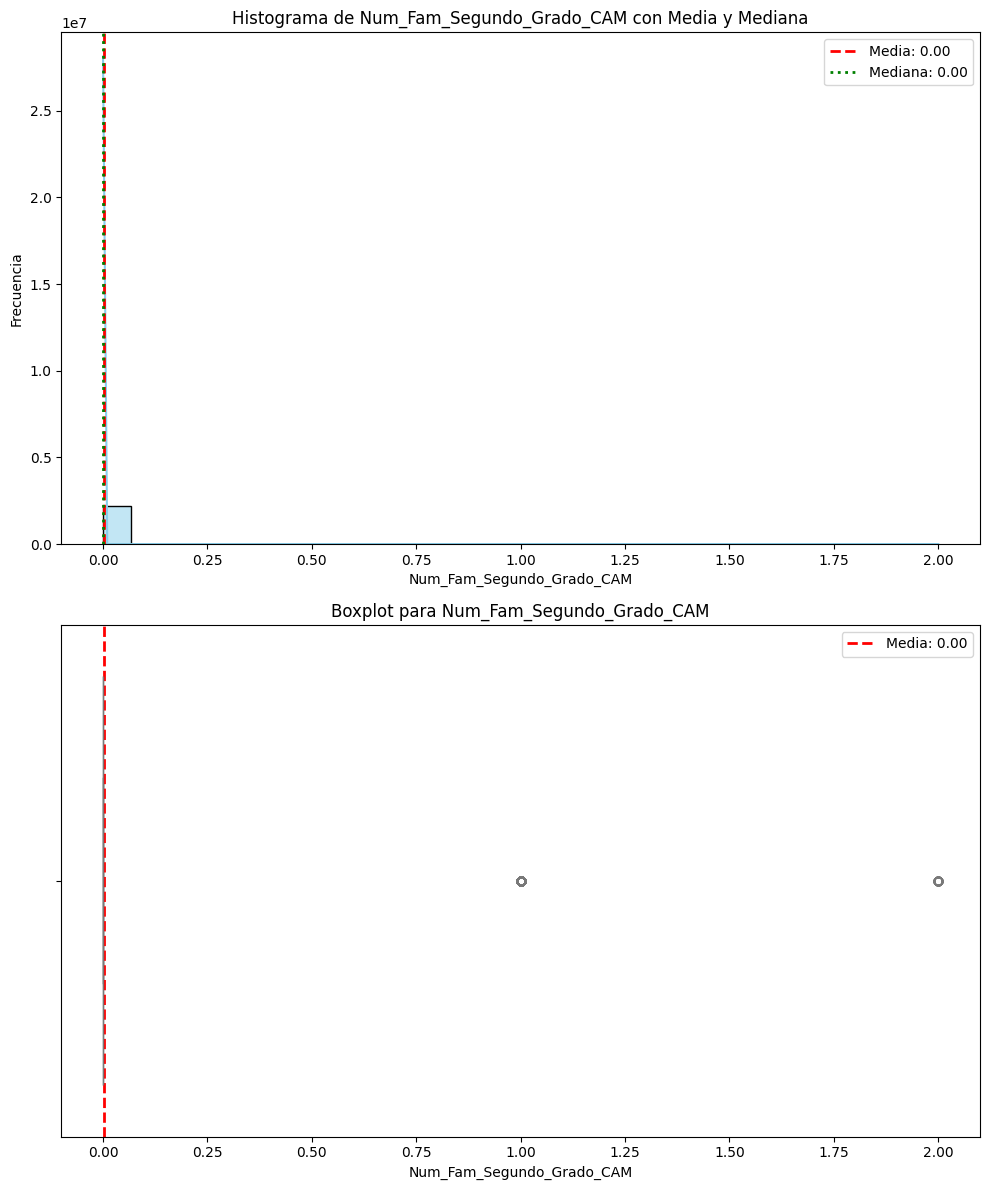

In [103]:
for var in numerical_vars:
    analisis_univariado_num(data_raw, var)

#### Variables categóricas

In [111]:
cat_vars = ['Ind_CAM','Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc',
       'Ind_Terapia_Hormonal', 'Num_Birads', 'Ind_Ooforectomia_Bilateral',
       'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax',
       'Ind_Ant_Fam_Otros_Esperado']

In [105]:
def analisis_univariado_cat(df, variable):
    """
    Analiza una variable categóricas, mostrando:
    1. Tabla con estadísticas descriptivas (describe())
    2. Porcentaje de cada categoría
    3. Gráfico de barras

    Args:
    - df: DataFrame con los datos
    - variable: Nombre de la variable numérica a analizar (str)
    """
    # Verificar si la variable existe en el DataFrame
    if variable not in df.columns:
        print(f"La variable '{variable}' no está en el DataFrame.")
        return

    # Tabla de estadísticas descriptivas
    print(f"Estadísticas descriptivas para '{variable}':")
    print(df[variable].describe())
    print("\n")

    # Porcentaje de cada categoría
    print(df[variable].value_counts(normalize=True) * 100)

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, data=df)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Conteo')
    plt.show()


Estadísticas descriptivas para 'Ind_CAM':
count     2190210
unique          2
top            No
freq      2171958
Name: Ind_CAM, dtype: object


Ind_CAM
No   99.166655
Si    0.833345
Name: proportion, dtype: float64


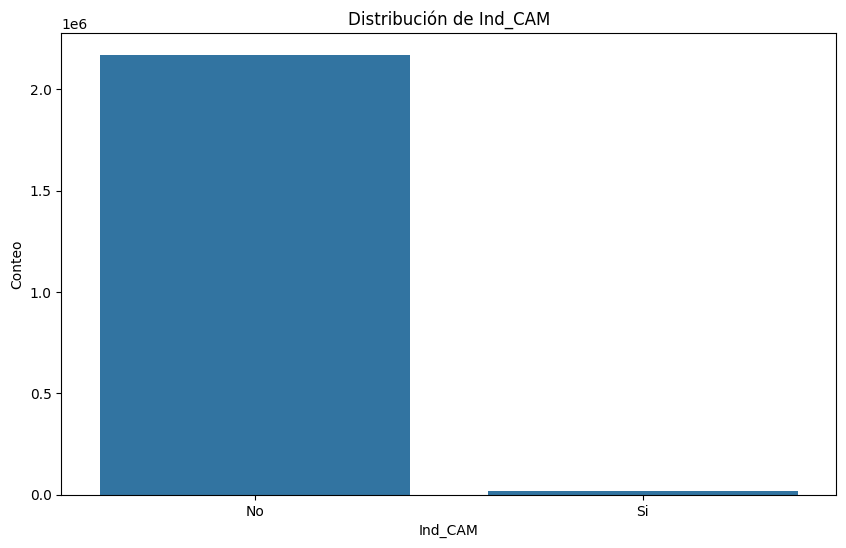

Estadísticas descriptivas para 'Ind_Frecuencia_Licor':
count     1449639
unique          2
top            No
freq      1192433
Name: Ind_Frecuencia_Licor, dtype: object


Ind_Frecuencia_Licor
No   82.257238
Si   17.742762
Name: proportion, dtype: float64


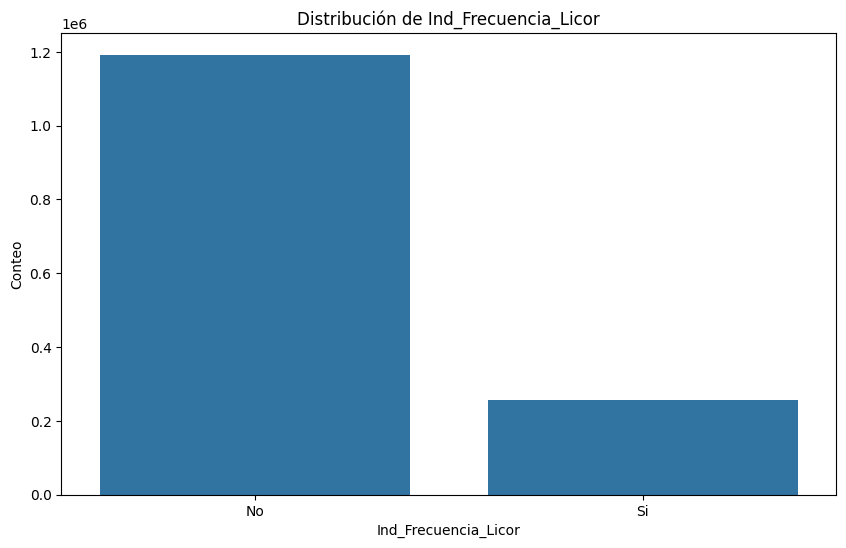

Estadísticas descriptivas para 'Sexo_Cd':
count     2190210
unique          1
top             F
freq      2190210
Name: Sexo_Cd, dtype: object


Sexo_Cd
F   100.000000
Name: proportion, dtype: float64


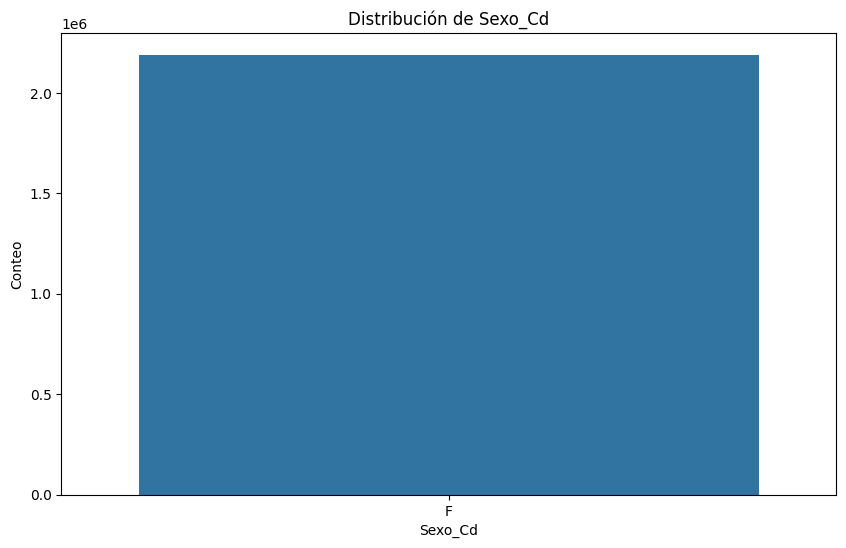

Estadísticas descriptivas para 'Raza_Desc':
count      637948
unique          6
top       MESTIZO
freq       478445
Name: Raza_Desc, dtype: object


Raza_Desc
MESTIZO         74.997492
BLANCO          21.618533
AFROAMERICANO    2.832206
MULATO           0.355358
ZAMBO            0.137629
INDÍGENA         0.058782
Name: proportion, dtype: float64


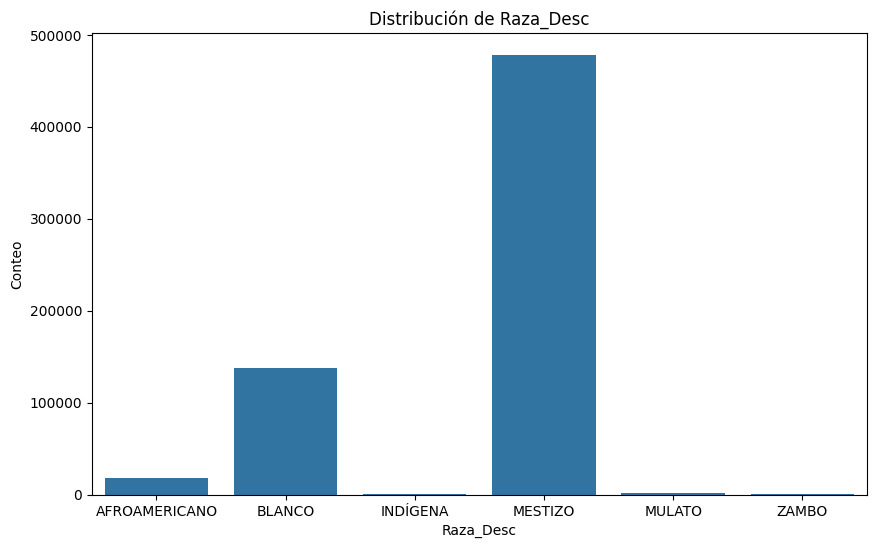

Estadísticas descriptivas para 'Ind_Terapia_Hormonal':
count     2190210
unique          2
top            No
freq      2186046
Name: Ind_Terapia_Hormonal, dtype: object


Ind_Terapia_Hormonal
No   99.809881
Si    0.190119
Name: proportion, dtype: float64


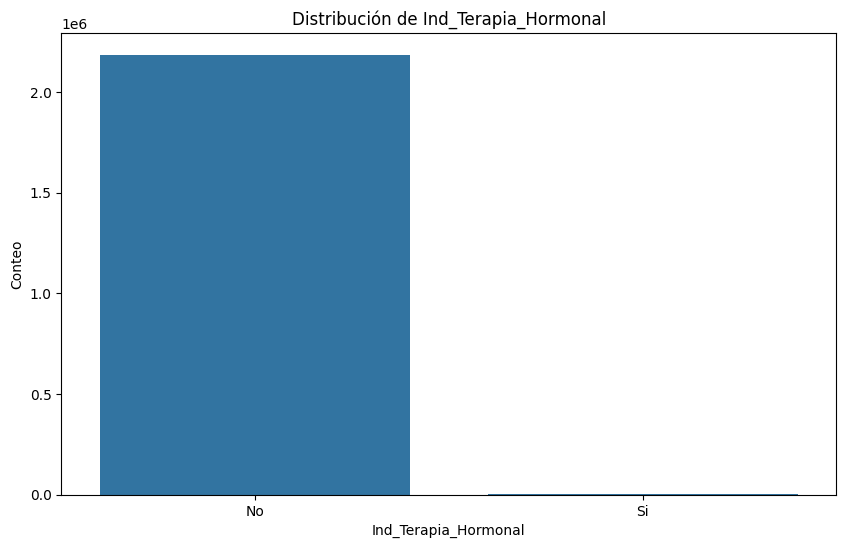

Estadísticas descriptivas para 'Num_Birads':
count     483376
unique         7
top            2
freq      289106
Name: Num_Birads, dtype: object


Num_Birads
2   59.809755
1   21.900756
3    9.589016
0    4.744340
4    3.871520
5    0.063305
6    0.021308
Name: proportion, dtype: float64


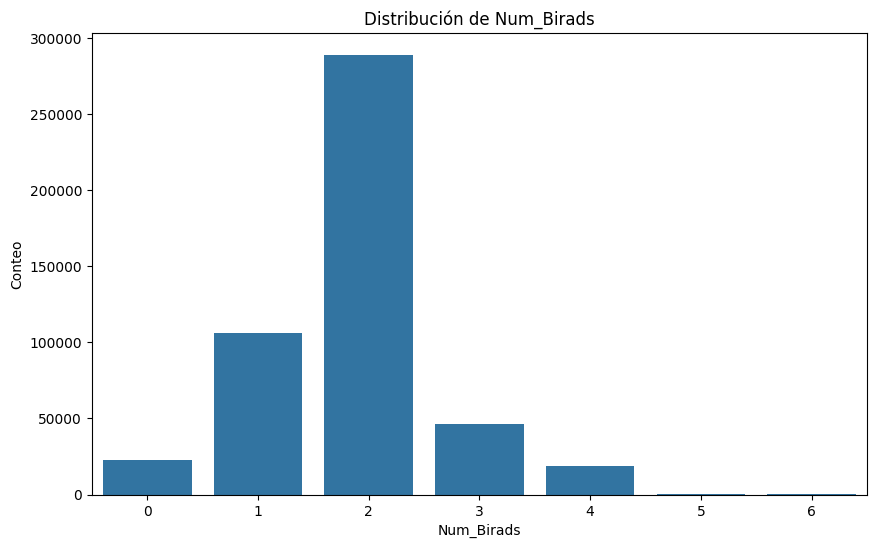

Estadísticas descriptivas para 'Ind_Ooforectomia_Bilateral':
count     2190210
unique          2
top            No
freq      2186211
Name: Ind_Ooforectomia_Bilateral, dtype: object


Ind_Ooforectomia_Bilateral
No   99.817415
Si    0.182585
Name: proportion, dtype: float64


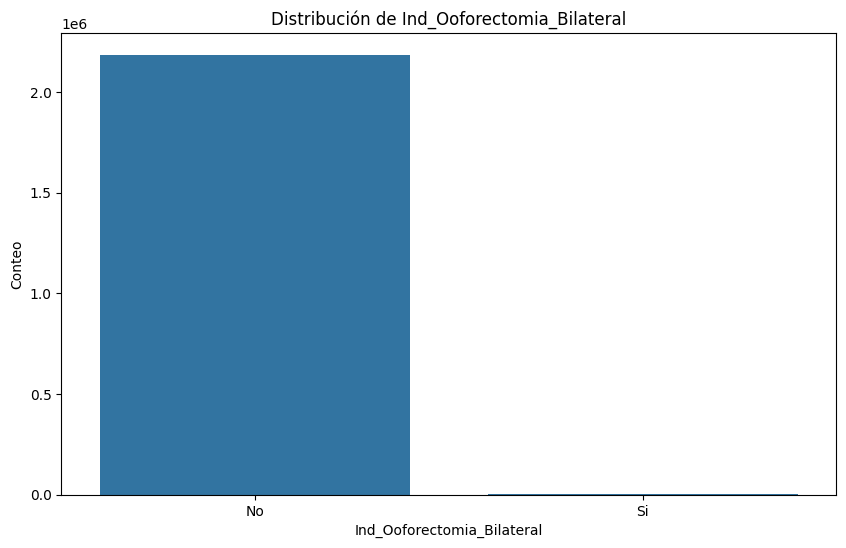

Estadísticas descriptivas para 'Ind_Ant_Fam_CAM':
count     2190210
unique          2
top            No
freq      2182078
Name: Ind_Ant_Fam_CAM, dtype: object


Ind_Ant_Fam_CAM
No   99.628711
Si    0.371289
Name: proportion, dtype: float64


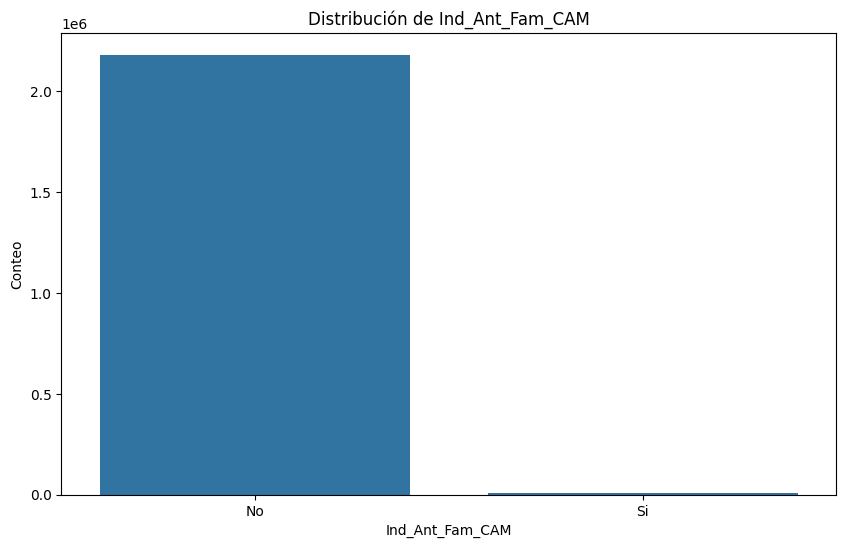

Estadísticas descriptivas para 'Ind_Ant_Radio_Torax':
count     2190210
unique          2
top            No
freq      1790150
Name: Ind_Ant_Radio_Torax, dtype: object


Ind_Ant_Radio_Torax
No   81.734172
Si   18.265828
Name: proportion, dtype: float64


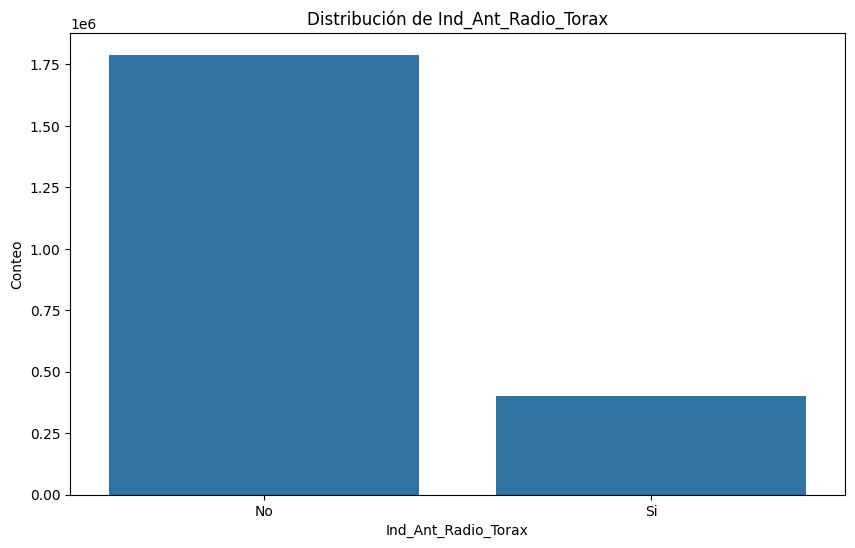

Estadísticas descriptivas para 'Ind_Ant_Fam_Otros_Esperado':
count     2190210
unique          2
top            No
freq      2006987
Name: Ind_Ant_Fam_Otros_Esperado, dtype: object


Ind_Ant_Fam_Otros_Esperado
No   91.634455
Si    8.365545
Name: proportion, dtype: float64


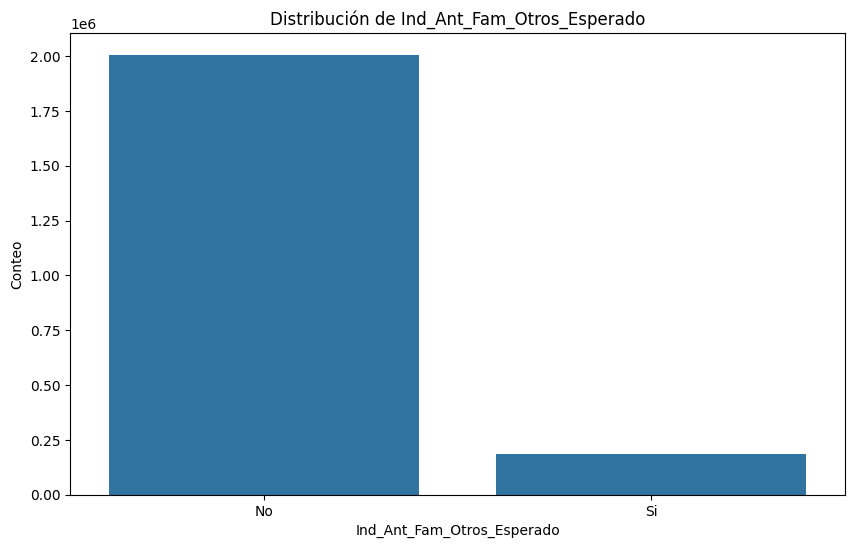

In [106]:
for var in cat_vars:
    analisis_univariado_cat(data_raw, var)

### **Análisis bivariado**

Inicialmente, se procede a evaluar cada una de las variables independientes vs la variable dependiente.

#### Variables númericas

In [107]:
def analisis_bivariado_num(df, variable_independiente, variable_dependiente = 'Ind_CAM'):
    """
    Analiza la relación entre una variable numérica independiente y una variable dependiente categórica, mostrando:
    1. Estadísticas descriptivas de la variable independiente, agrupadas por la variable dependiente.
    2. Visualización combinada de:
        - Boxplot de la variable independiente por categorías de la variable dependiente.
        - Histogramas por categoría superpuestos.
    3. Prueba de hipótesis para evaluar diferencias entre las categorías (t-test o Mann-Whitney U).

    Args:
    - df: DataFrame con los datos.
    - variable_independiente: Nombre de la variable numérica independiente (str).
    - variable_dependiente: Nombre de la variable categórica dependiente (str).
    """
    # Verificar si las variables existen en el DataFrame
    if variable_independiente not in df.columns or variable_dependiente not in df.columns:
        print(f"Una o ambas variables no están en el DataFrame.")
        return

    # Verificar que la variable dependiente sea categórica
    if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
        df[variable_dependiente] = df[variable_dependiente].astype('category')

    print(f"Análisis bivariado entre '{variable_independiente}' y '{variable_dependiente}'\n")
    
    # Estadísticas descriptivas agrupadas por la variable dependiente
    grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()
    print("Estadísticas descriptivas por categoría:")
    print(grouped_stats)
    print("\n")

    # Gráficos combinados: Boxplot y Histogramas
    categories = df[variable_dependiente].unique()

    plt.figure(figsize=(14, 8))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette="Set3")
    plt.title(f"Boxplot de {variable_independiente} por {variable_dependiente}")
    plt.xlabel(variable_dependiente)
    plt.ylabel(variable_independiente)

    # Histogramas superpuestos
    plt.subplot(1, 2, 2)
    for category in categories:
        sns.histplot(
            df[df[variable_dependiente] == category][variable_independiente].dropna(),
            kde=True,
            label=str(category),
            bins=30,
            alpha=0.5
        )
    plt.title(f"Histogramas de {variable_independiente} por {variable_dependiente}")
    plt.xlabel(variable_independiente)
    plt.ylabel("Frecuencia")
    plt.legend(title=variable_dependiente)

    plt.tight_layout()
    plt.show()

    # Prueba de hipótesis
    if len(categories) == 2:  # Prueba entre dos categorías
        group1 = df[df[variable_dependiente] == categories[0]][variable_independiente].dropna()
        group2 = df[df[variable_dependiente] == categories[1]][variable_independiente].dropna()
        
        # Prueba t de Student (si los datos son normales) o U de Mann-Whitney (si no lo son)
        stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Prueba t
        print(f"Prueba t entre {categories[0]} y {categories[1]}:")
        print(f"Estadístico: {stat:.4f}, p-valor: {p_value:.4f}")
        
        if p_value < 0.05:
            print("Conclusión: Existen diferencias significativas entre las categorías.\n")
        else:
            print("Conclusión: No se encontraron diferencias significativas entre las categorías.\n")
    else:
        print("Nota: La variable dependiente tiene más de dos categorías. Considera usar ANOVA para evaluar diferencias.\n")



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()


Análisis bivariado entre 'Valor_IMC' y 'Ind_CAM'

Estadísticas descriptivas por categoría:
                 count      mean      std       min       25%       50%  \
Ind_CAM                                                                   
No      1932212.000000 26.631549 4.909596 13.000000 23.309053 25.960000   
Si        15851.000000 26.689465 4.709002 13.619612 23.437500 26.037494   

              75%       max  
Ind_CAM                      
No      29.296875 89.970000  
Si      29.270994 77.000000  




C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette="Set3")


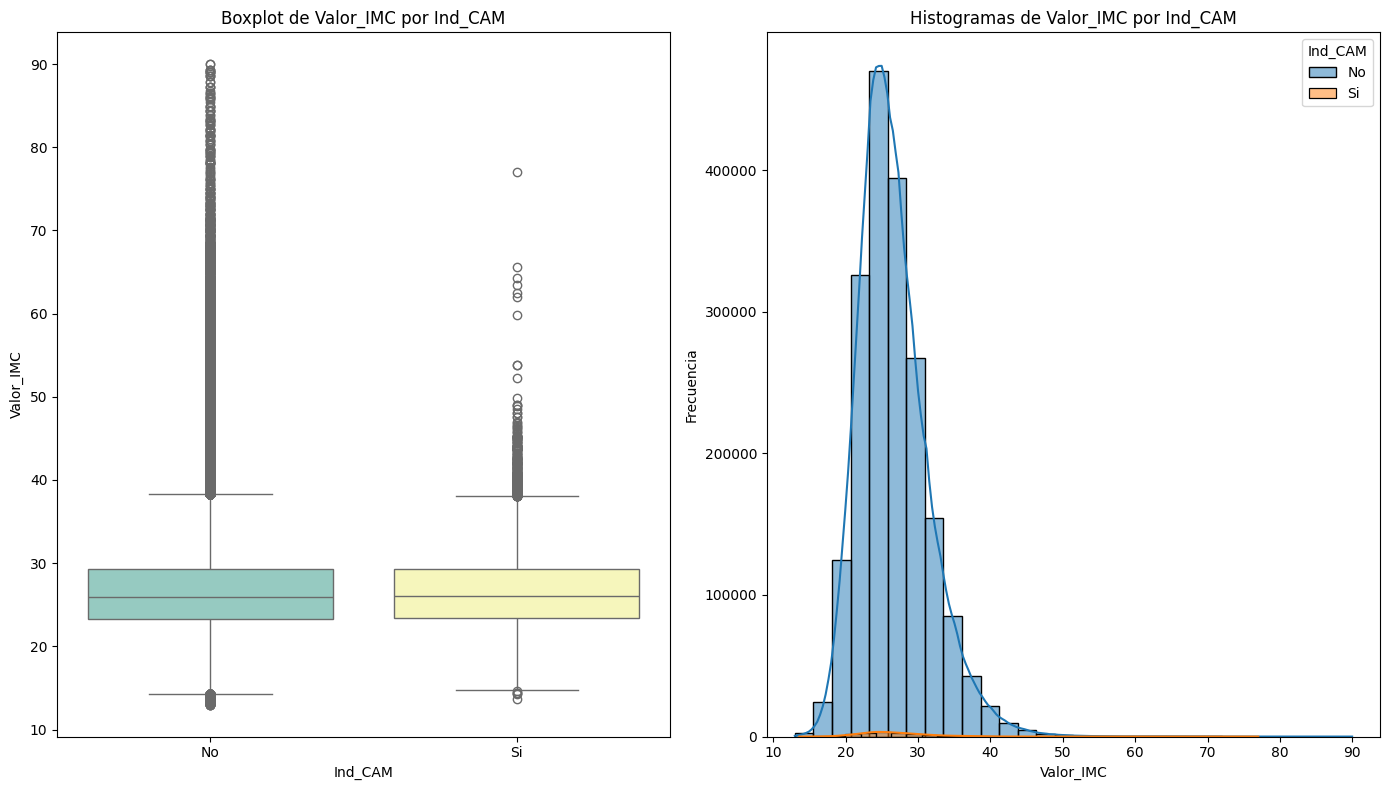

Prueba t entre No y Si:
Estadístico: -1.5416, p-valor: 0.1232
Conclusión: No se encontraron diferencias significativas entre las categorías.

Análisis bivariado entre 'Num_Edad_Menopausia' y 'Ind_CAM'

Estadísticas descriptivas por categoría:
               count      mean      std       min       25%       50%  \
Ind_CAM                                                                 
No      29649.000000 47.628419 4.582433 36.000000 45.000000 48.000000   
Si       1535.000000 48.094463 4.620917 36.000000 45.000000 49.000000   

              75%       max  
Ind_CAM                      
No      51.000000 57.000000  
Si      51.000000 57.000000  




C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette

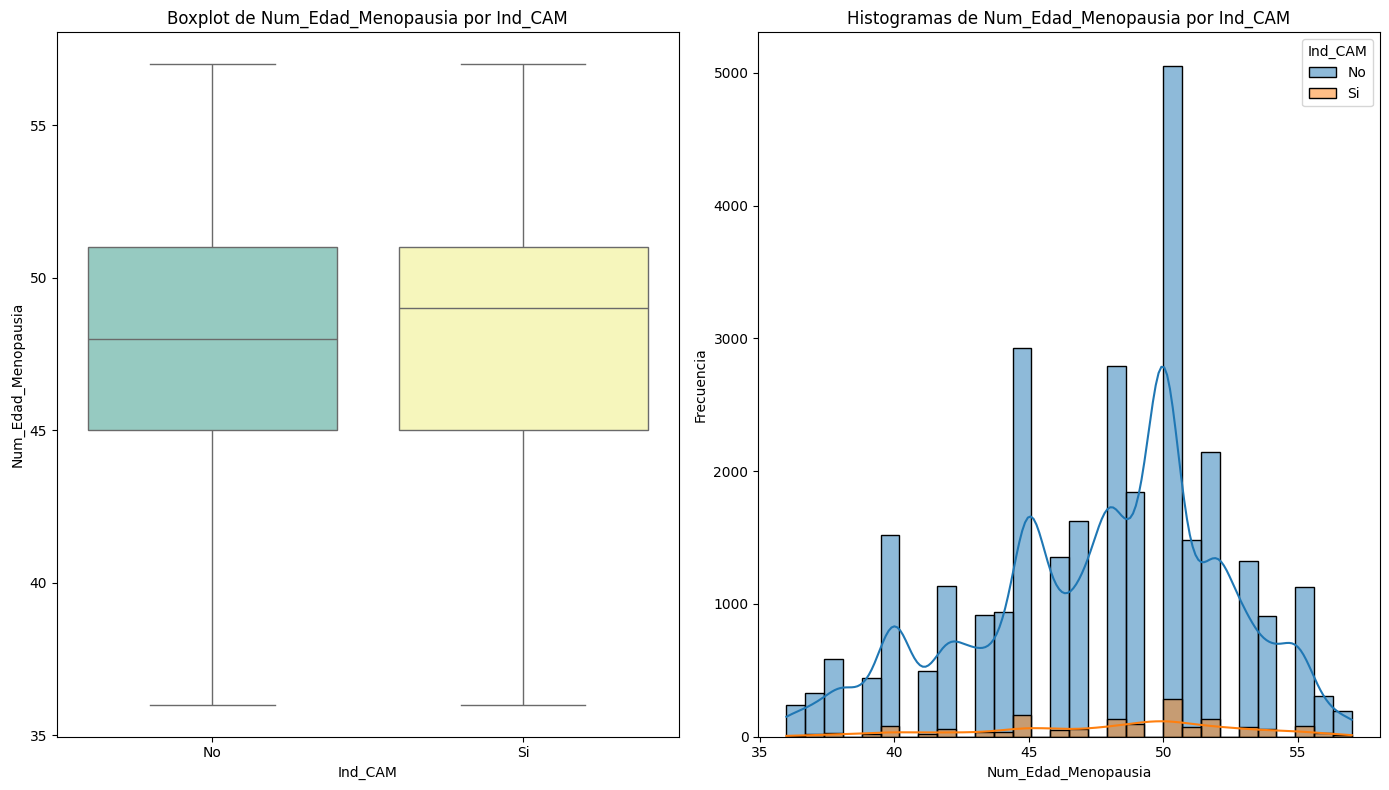

Prueba t entre No y Si:
Estadístico: -3.8545, p-valor: 0.0001
Conclusión: Existen diferencias significativas entre las categorías.

Análisis bivariado entre 'Num_Edad_Menarca' y 'Ind_CAM'

Estadísticas descriptivas por categoría:
                count      mean      std      min      25%       50%  \
Ind_CAM                                                                
No      876560.000000 11.047626 2.064021 9.000000 9.000000 11.000000   
Si       12046.000000 10.994604 2.182246 9.000000 9.000000 11.000000   

              75%       max  
Ind_CAM                      
No      13.000000 17.000000  
Si      13.000000 17.000000  




C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette

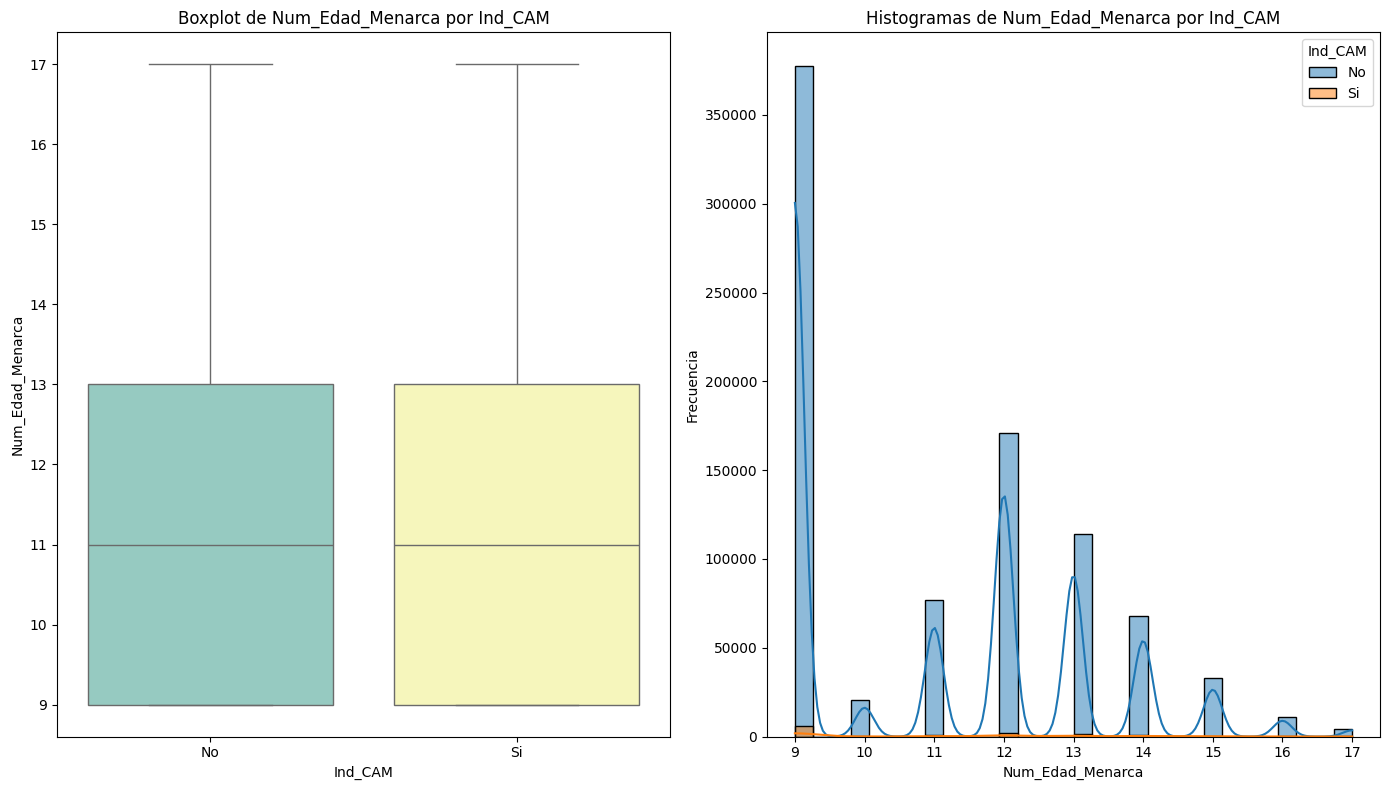

Prueba t entre No y Si:
Estadístico: 2.6505, p-valor: 0.0080
Conclusión: Existen diferencias significativas entre las categorías.

Análisis bivariado entre 'Edad' y 'Ind_CAM'

Estadísticas descriptivas por categoría:
                 count      mean       std       min       25%       50%  \
Ind_CAM                                                                    
No      2171958.000000 43.066770 16.728260 18.000000 29.000000 40.000000   
Si        18252.000000 54.198060 14.441327 18.000000 44.000000 54.000000   

              75%        max  
Ind_CAM                       
No      55.000000 139.000000  
Si      64.000000 106.000000  




C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette

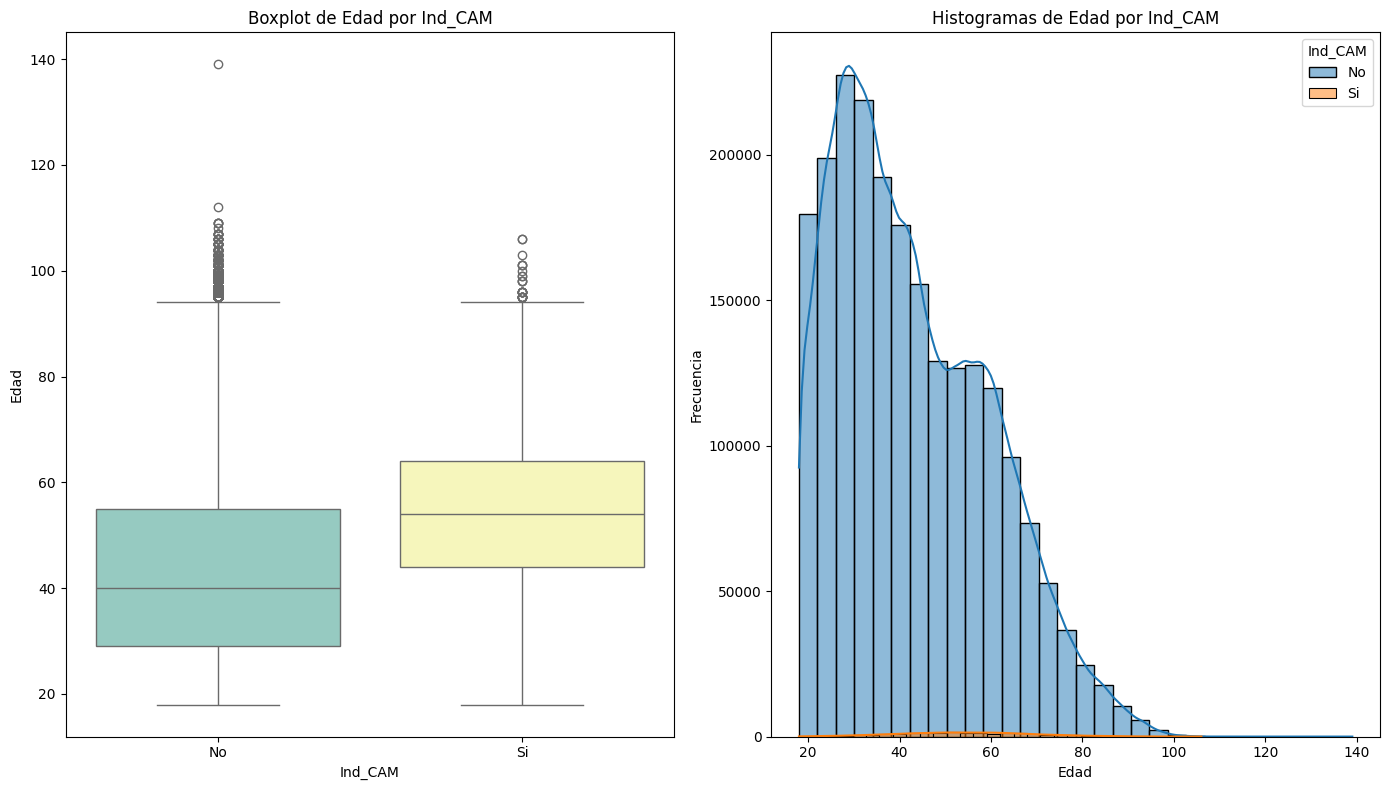

Prueba t entre No y Si:
Estadístico: -103.5521, p-valor: 0.0000
Conclusión: Existen diferencias significativas entre las categorías.

Análisis bivariado entre 'Num_Fam_Primer_Grado_Otros' y 'Ind_CAM'

Estadísticas descriptivas por categoría:
                 count     mean      std      min      25%      50%      75%  \
Ind_CAM                                                                        
No      2171958.000000 0.052243 0.252679 0.000000 0.000000 0.000000 0.000000   
Si        18252.000000 0.117138 0.387716 0.000000 0.000000 0.000000 0.000000   

             max  
Ind_CAM           
No      4.000000  
Si      4.000000  




C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette

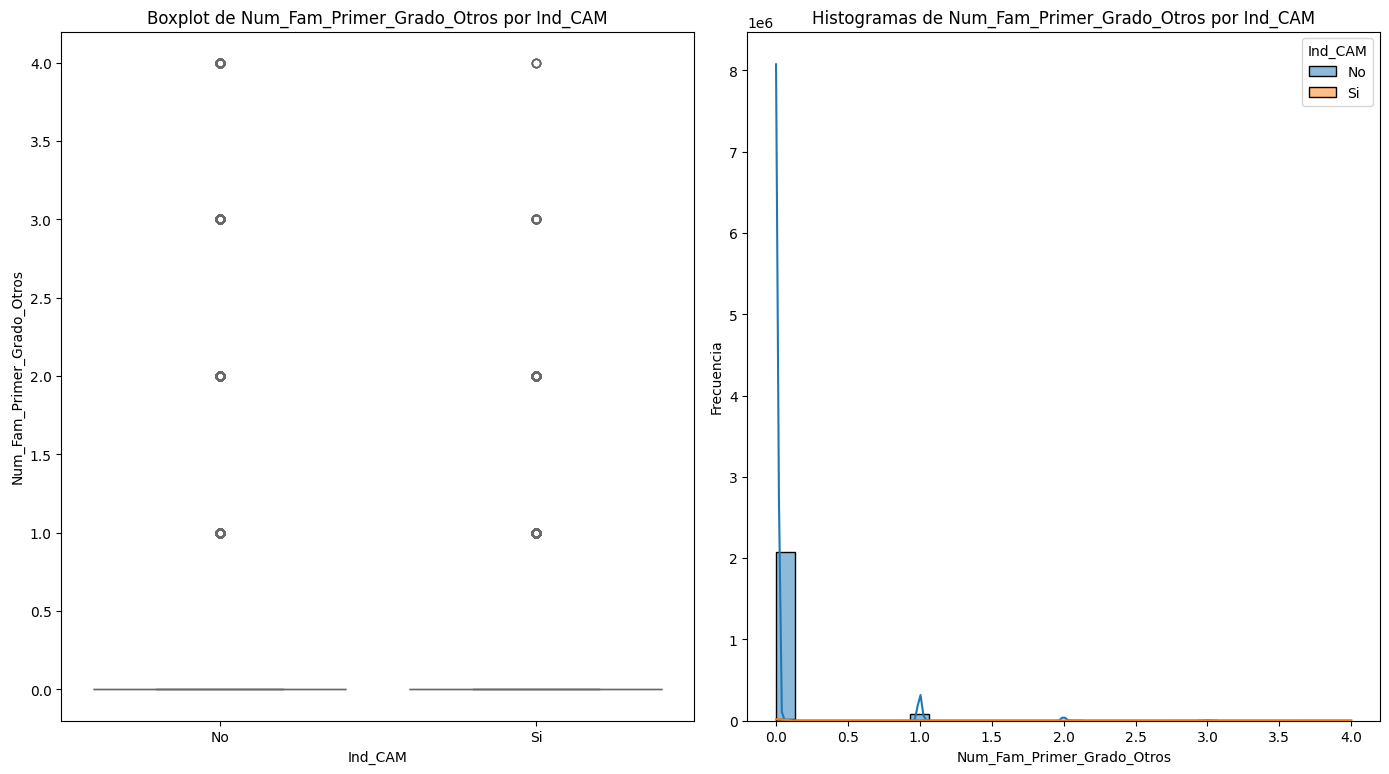

Prueba t entre No y Si:
Estadístico: -22.5723, p-valor: 0.0000
Conclusión: Existen diferencias significativas entre las categorías.

Análisis bivariado entre 'Num_Fam_Segundo_Grado_Otros' y 'Ind_CAM'

Estadísticas descriptivas por categoría:
                 count     mean      std      min      25%      50%      75%  \
Ind_CAM                                                                        
No      2171958.000000 0.047137 0.229948 0.000000 0.000000 0.000000 0.000000   
Si        18252.000000 0.050679 0.242370 0.000000 0.000000 0.000000 0.000000   

             max  
Ind_CAM           
No      3.000000  
Si      3.000000  




C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette

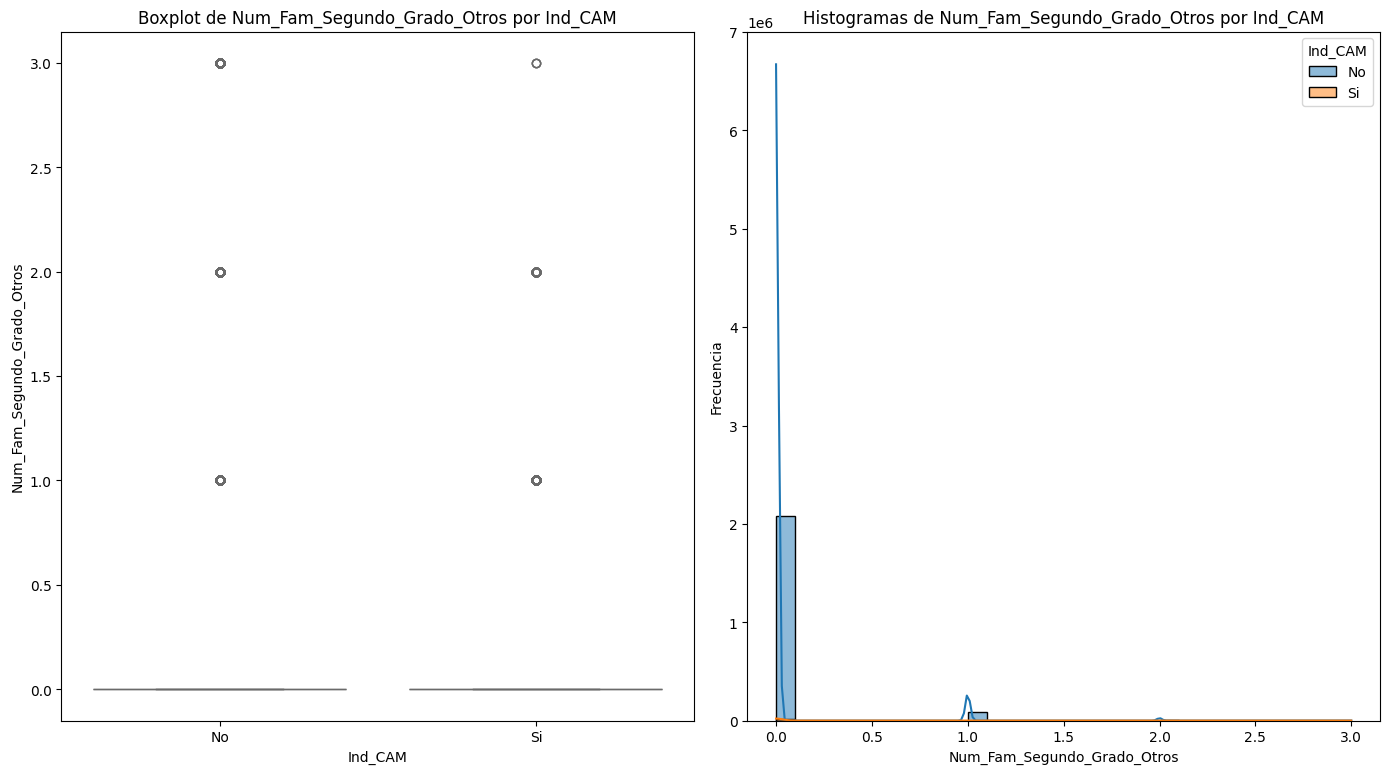

Prueba t entre No y Si:
Estadístico: -1.9670, p-valor: 0.0492
Conclusión: Existen diferencias significativas entre las categorías.

Análisis bivariado entre 'Num_Fam_Primer_Grado_CAM' y 'Ind_CAM'

Estadísticas descriptivas por categoría:
                 count     mean      std      min      25%      50%      75%  \
Ind_CAM                                                                        
No      2171958.000000 0.002109 0.046525 0.000000 0.000000 0.000000 0.000000   
Si        18252.000000 0.039283 0.202287 0.000000 0.000000 0.000000 0.000000   

             max  
Ind_CAM           
No      2.000000  
Si      2.000000  




C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette

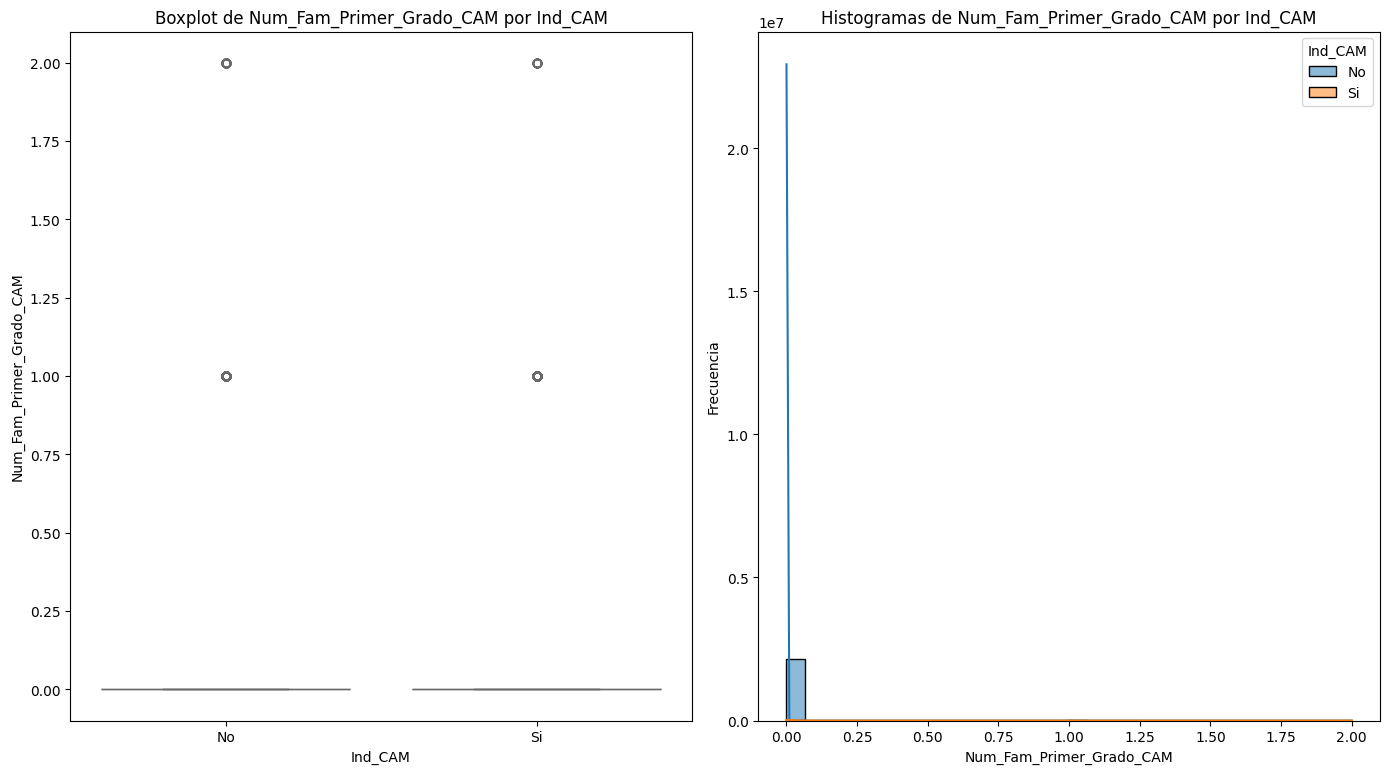

Prueba t entre No y Si:
Estadístico: -24.8217, p-valor: 0.0000
Conclusión: Existen diferencias significativas entre las categorías.

Análisis bivariado entre 'Num_Fam_Segundo_Grado_CAM' y 'Ind_CAM'

Estadísticas descriptivas por categoría:
                 count     mean      std      min      25%      50%      75%  \
Ind_CAM                                                                        
No      2171958.000000 0.001392 0.037997 0.000000 0.000000 0.000000 0.000000   
Si        18252.000000 0.004493 0.069293 0.000000 0.000000 0.000000 0.000000   

             max  
Ind_CAM           
No      2.000000  
Si      2.000000  




C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby(variable_dependiente)[variable_independiente].describe()
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\318146419.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=variable_dependiente, y=variable_independiente, palette

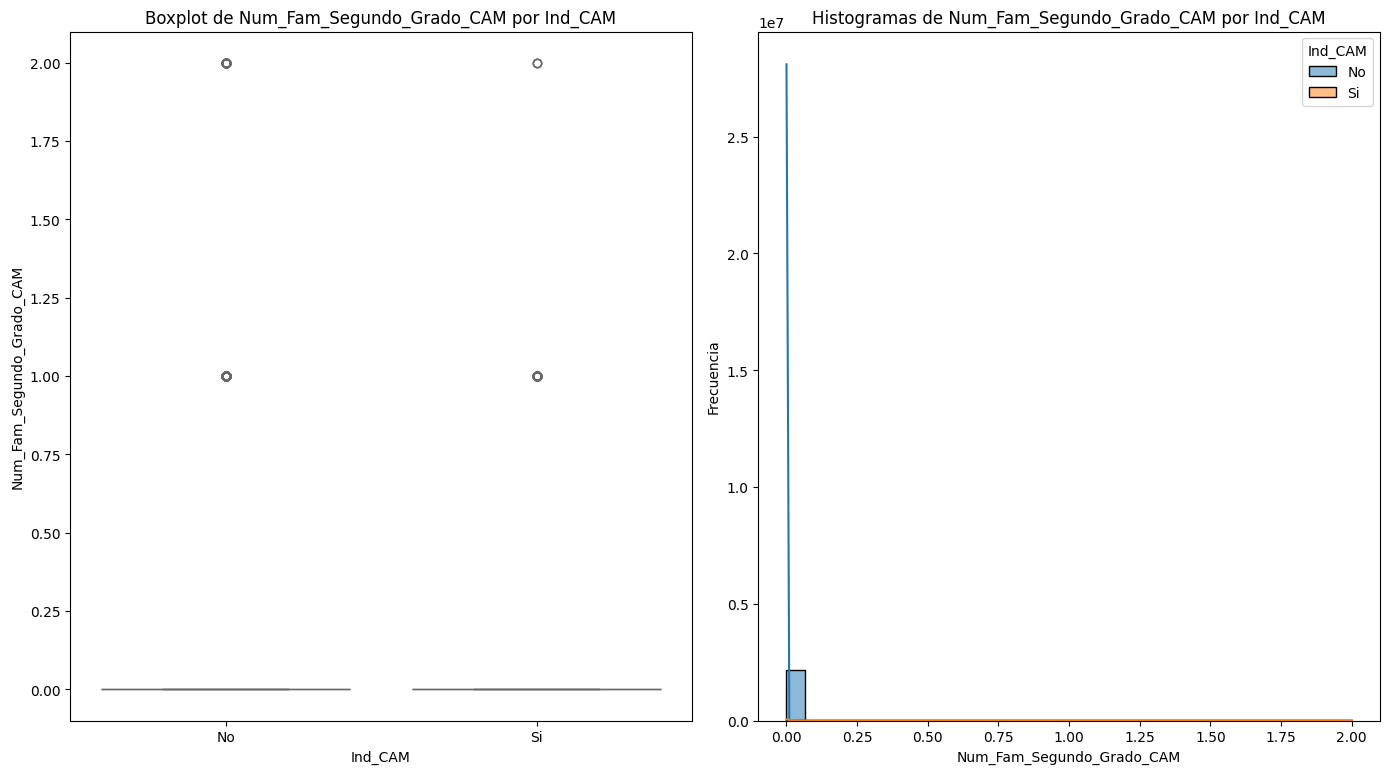

Prueba t entre No y Si:
Estadístico: -6.0372, p-valor: 0.0000
Conclusión: Existen diferencias significativas entre las categorías.



In [108]:
for var in numerical_vars:
    analisis_bivariado_num(data_raw, var)

#### Variables categóricas

In [109]:
def analisis_bivariado_cat(df, variable_independiente, variable_dependiente= 'Ind_CAM'):
    """
    Analiza la relación entre una variable categórica independiente y una variable dependiente categórica, mostrando:
    1. Tabla de frecuencias cruzadas entre ambas variables.
    2. Porcentajes por categoría de la variable independiente, desglosados por la dependiente.
    3. Gráfico de barras apiladas.

    Args:
    - df: DataFrame con los datos.
    - variable_independiente: Nombre de la variable categórica independiente (str).
    - variable_dependiente: Nombre de la variable categórica dependiente (str).
    """
    # Verificar si las variables existen en el DataFrame
    if variable_independiente not in df.columns or variable_dependiente not in df.columns:
        print(f"Una o ambas variables no están en el DataFrame.")
        return

    # Verificar que ambas variables sean categóricas
    if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
        df[variable_independiente] = df[variable_independiente].astype('category')
    if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):
        df[variable_dependiente] = df[variable_dependiente].astype('category')

    print(f"Análisis bivariado entre '{variable_independiente}' y '{variable_dependiente}'\n")
    
    # Tabla de frecuencias cruzadas
    freq_table = pd.crosstab(df[variable_independiente], df[variable_dependiente])
    print("Tabla de frecuencias cruzadas:")
    print(freq_table)
    print("\n")

    # Porcentajes por categoría de la variable independiente
    percent_table = pd.crosstab(df[variable_independiente], df[variable_dependiente], normalize='index') * 100
    print("Porcentaje por categoría de la variable independiente:")
    print(percent_table)
    print("\n")

    # Gráfico de barras apiladas
    freq_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
    plt.title(f"Distribución de {variable_dependiente} por {variable_independiente}")
    plt.xlabel(variable_independiente)
    plt.ylabel("Conteo")
    plt.legend(title=variable_dependiente, loc='upper right')
    plt.tight_layout()
    plt.show()


Análisis bivariado entre 'Ind_CAM' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM       No     Si
Ind_CAM                
No       2171958      0
Si             0  18252


Porcentaje por categoría de la variable independiente:
Ind_CAM         No         Si
Ind_CAM                      
No      100.000000   0.000000
Si        0.000000 100.000000




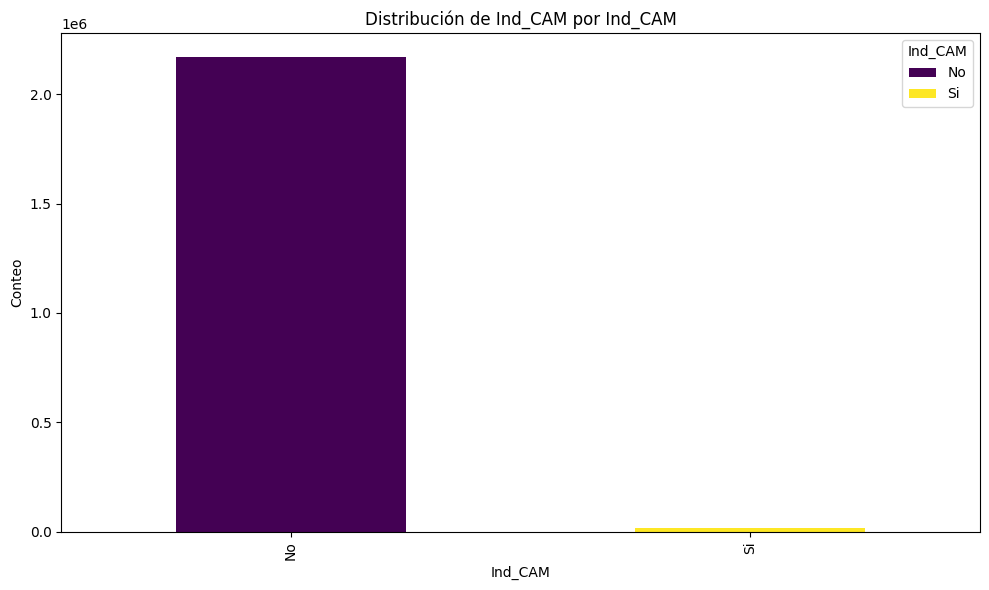

Análisis bivariado entre 'Ind_Frecuencia_Licor' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM                    No    Si
Ind_Frecuencia_Licor               
No                    1187268  5165
Si                     253481  3725


Porcentaje por categoría de la variable independiente:
Ind_CAM                     No       Si
Ind_Frecuencia_Licor                   
No                   99.566852 0.433148
Si                   98.551745 1.448255




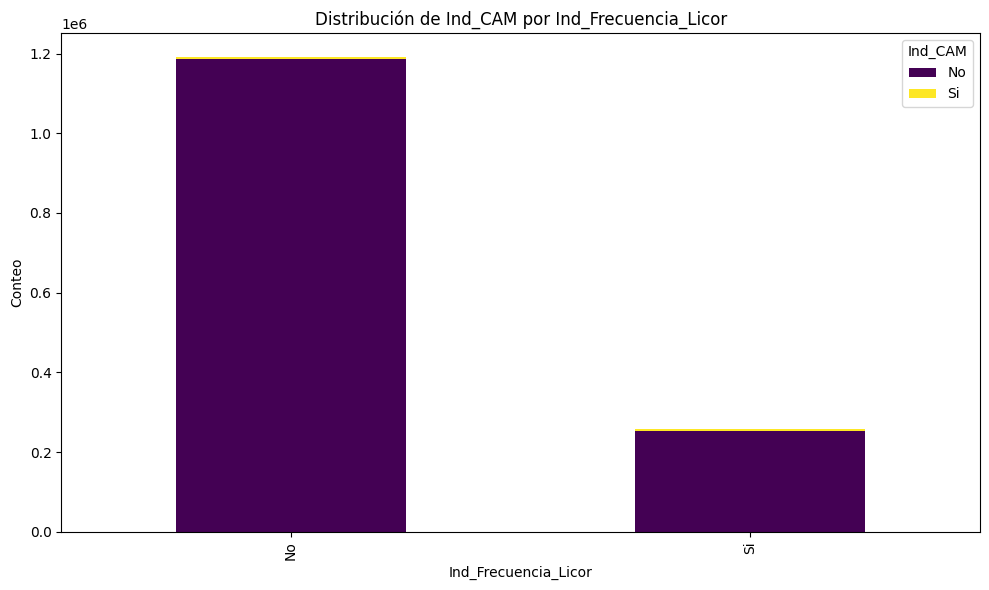

Análisis bivariado entre 'Sexo_Cd' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM       No     Si
Sexo_Cd                
F        2171958  18252


Porcentaje por categoría de la variable independiente:
Ind_CAM        No       Si
Sexo_Cd                   
F       99.166655 0.833345




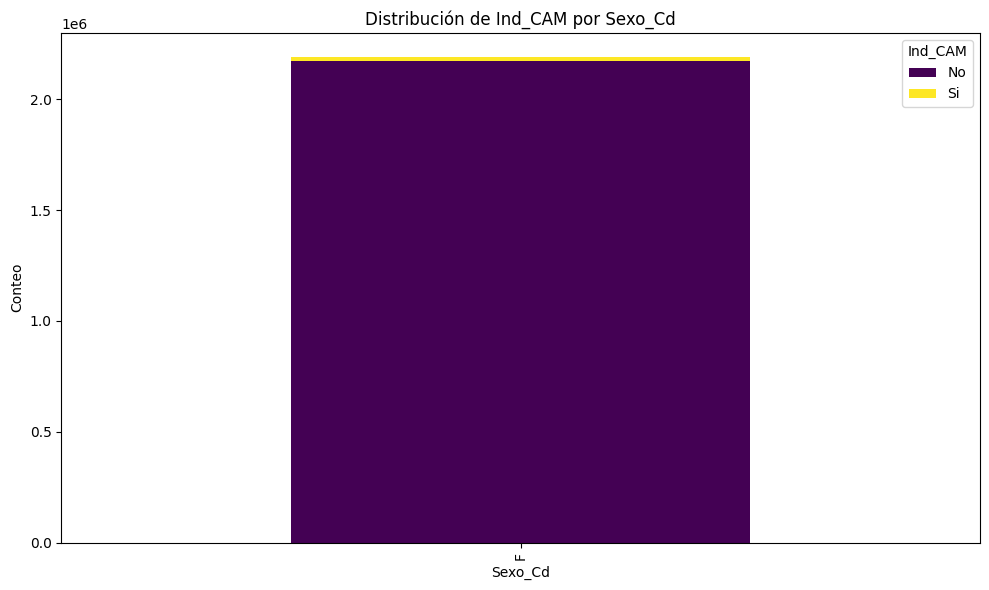

Análisis bivariado entre 'Raza_Desc' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM            No    Si
Raza_Desc                  
AFROAMERICANO   17860   208
BLANCO         135084  2831
INDÍGENA          370     5
MESTIZO        471298  7147
MULATO           2237    30
ZAMBO             863    15


Porcentaje por categoría de la variable independiente:
Ind_CAM              No       Si
Raza_Desc                       
AFROAMERICANO 98.848793 1.151207
BLANCO        97.947286 2.052714
INDÍGENA      98.666667 1.333333
MESTIZO       98.506202 1.493798
MULATO        98.676665 1.323335
ZAMBO         98.291572 1.708428




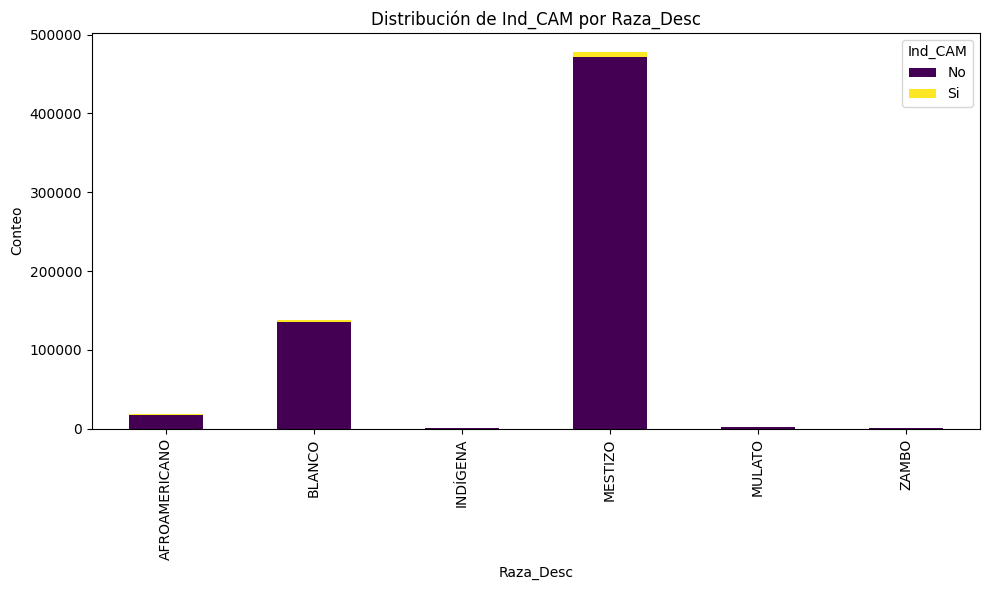

Análisis bivariado entre 'Ind_Terapia_Hormonal' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM                    No     Si
Ind_Terapia_Hormonal                
No                    2167887  18159
Si                       4071     93


Porcentaje por categoría de la variable independiente:
Ind_CAM                     No       Si
Ind_Terapia_Hormonal                   
No                   99.169322 0.830678
Si                   97.766571 2.233429




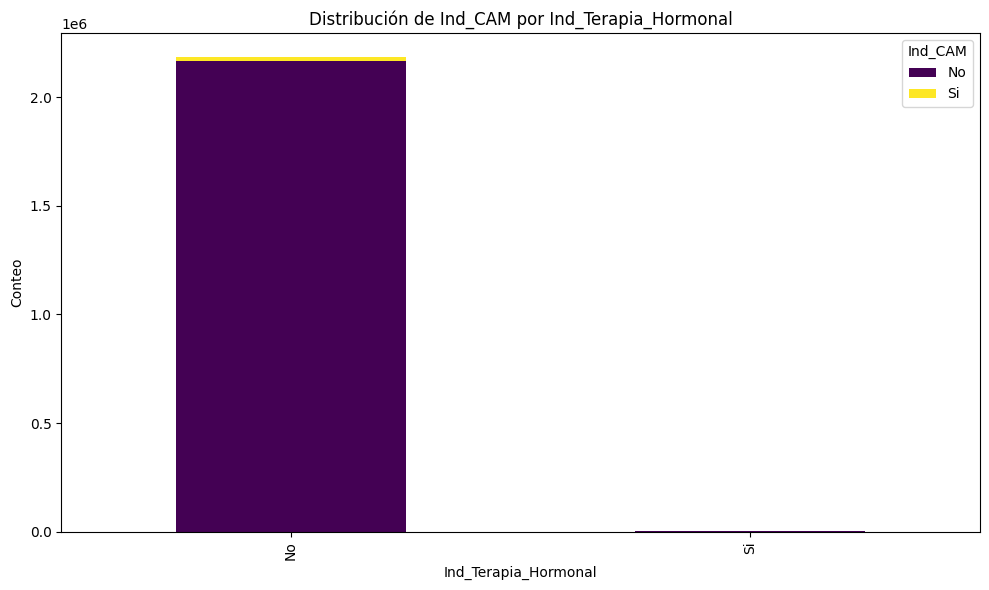

Análisis bivariado entre 'Num_Birads' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM         No    Si
Num_Birads              
0            22505   428
1           105140   723
2           285903  3203
3            45716   635
4            18300   414
5              281    25
6               99     4


Porcentaje por categoría de la variable independiente:
Ind_CAM           No       Si
Num_Birads                   
0          98.133694 1.866306
1          99.317042 0.682958
2          98.892102 1.107898
3          98.630019 1.369981
4          97.787752 2.212248
5          91.830065 8.169935
6          96.116505 3.883495




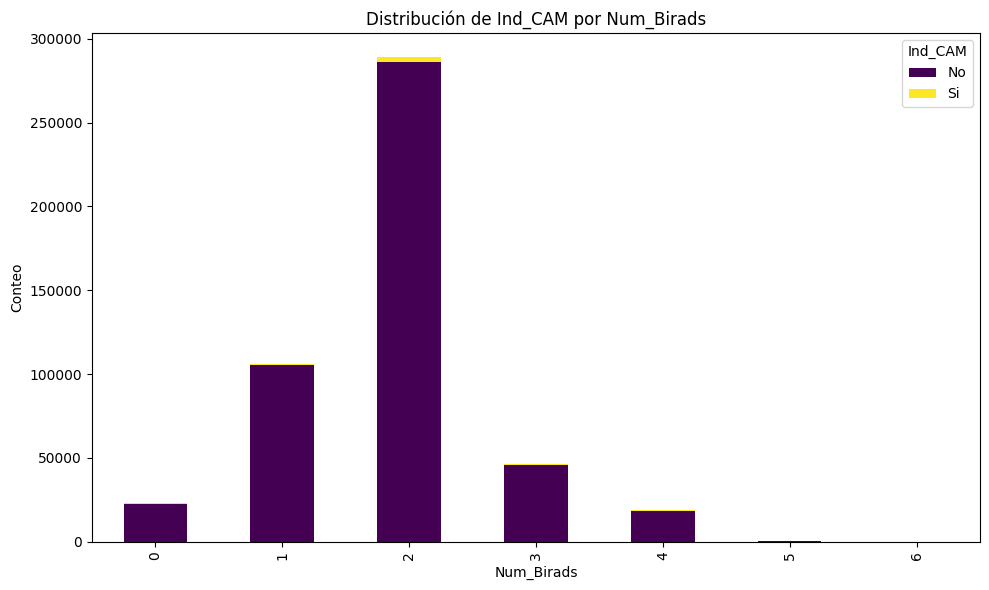

Análisis bivariado entre 'Ind_Ooforectomia_Bilateral' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM                          No     Si
Ind_Ooforectomia_Bilateral                
No                          2168069  18142
Si                             3889    110


Porcentaje por categoría de la variable independiente:
Ind_CAM                           No       Si
Ind_Ooforectomia_Bilateral                   
No                         99.170162 0.829838
Si                         97.249312 2.750688




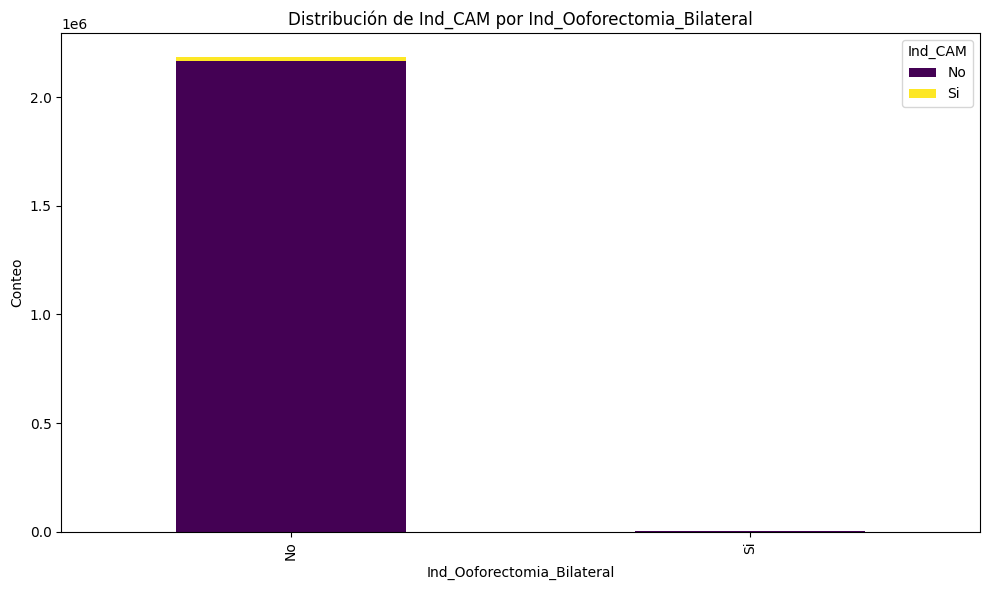

Análisis bivariado entre 'Ind_Ant_Fam_CAM' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM               No     Si
Ind_Ant_Fam_CAM                
No               2164583  17495
Si                  7375    757


Porcentaje por categoría de la variable independiente:
Ind_CAM                No       Si
Ind_Ant_Fam_CAM                   
No              99.198241 0.801759
Si              90.691097 9.308903




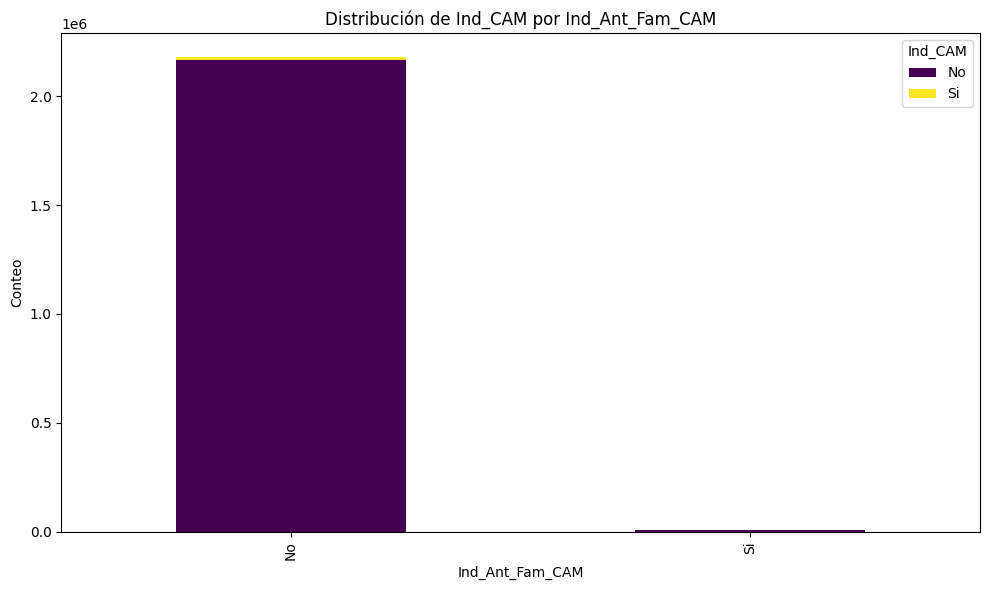

Análisis bivariado entre 'Ind_Ant_Radio_Torax' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM                   No     Si
Ind_Ant_Radio_Torax                
No                   1773394  16756
Si                    398564   1496


Porcentaje por categoría de la variable independiente:
Ind_CAM                    No       Si
Ind_Ant_Radio_Torax                   
No                  99.063989 0.936011
Si                  99.626056 0.373944




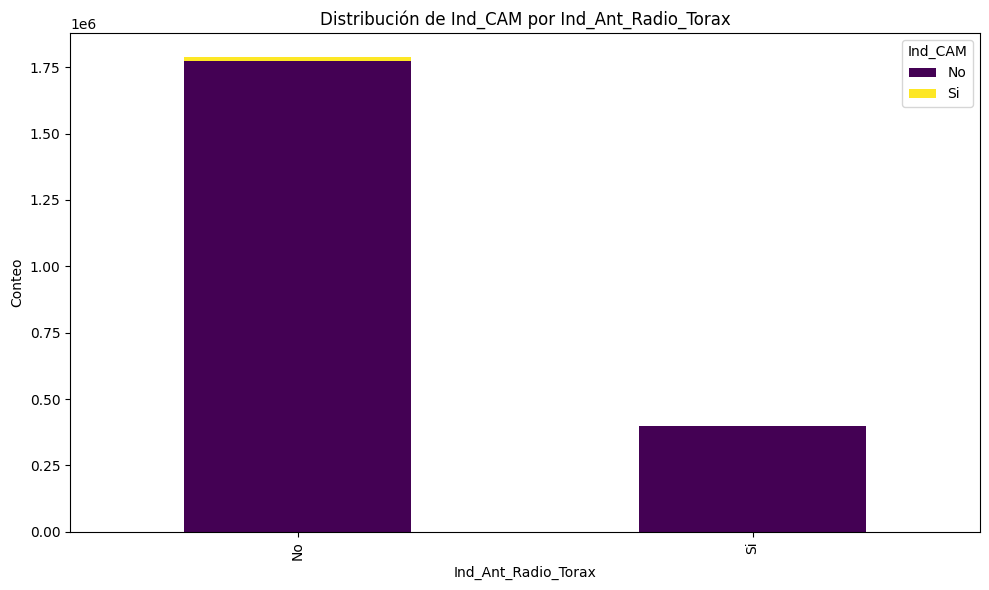

Análisis bivariado entre 'Ind_Ant_Fam_Otros_Esperado' y 'Ind_CAM'



C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_independiente]):
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1395977071.py:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[variable_dependiente]):


Tabla de frecuencias cruzadas:
Ind_CAM                          No     Si
Ind_Ant_Fam_Otros_Esperado                
No                          1991132  15855
Si                           180826   2397


Porcentaje por categoría de la variable independiente:
Ind_CAM                           No       Si
Ind_Ant_Fam_Otros_Esperado                   
No                         99.210010 0.789990
Si                         98.691758 1.308242




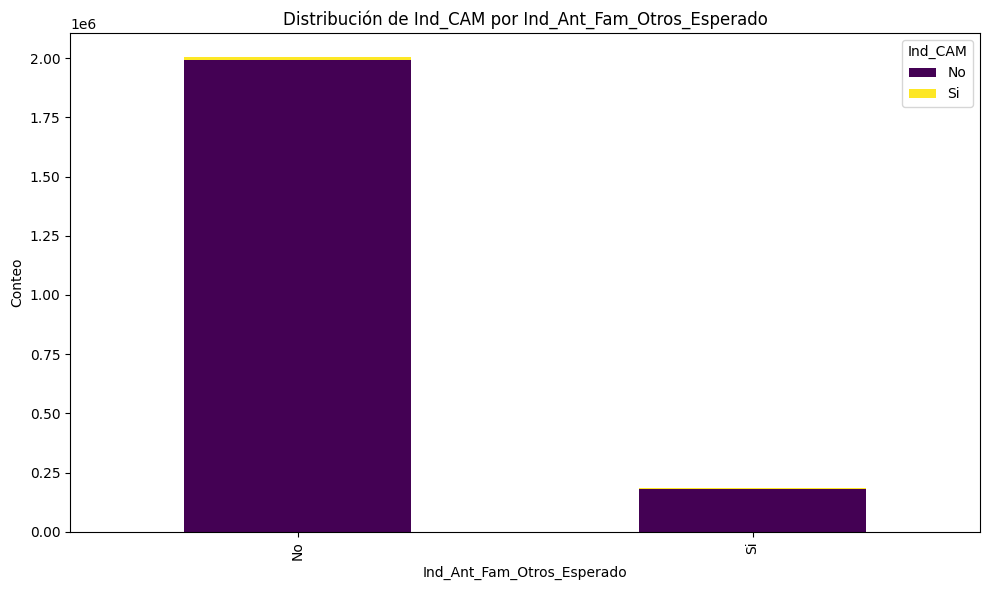

In [110]:
for var in cat_vars:
    analisis_bivariado_cat(data_raw, var)

#### Análisis bivariado todos

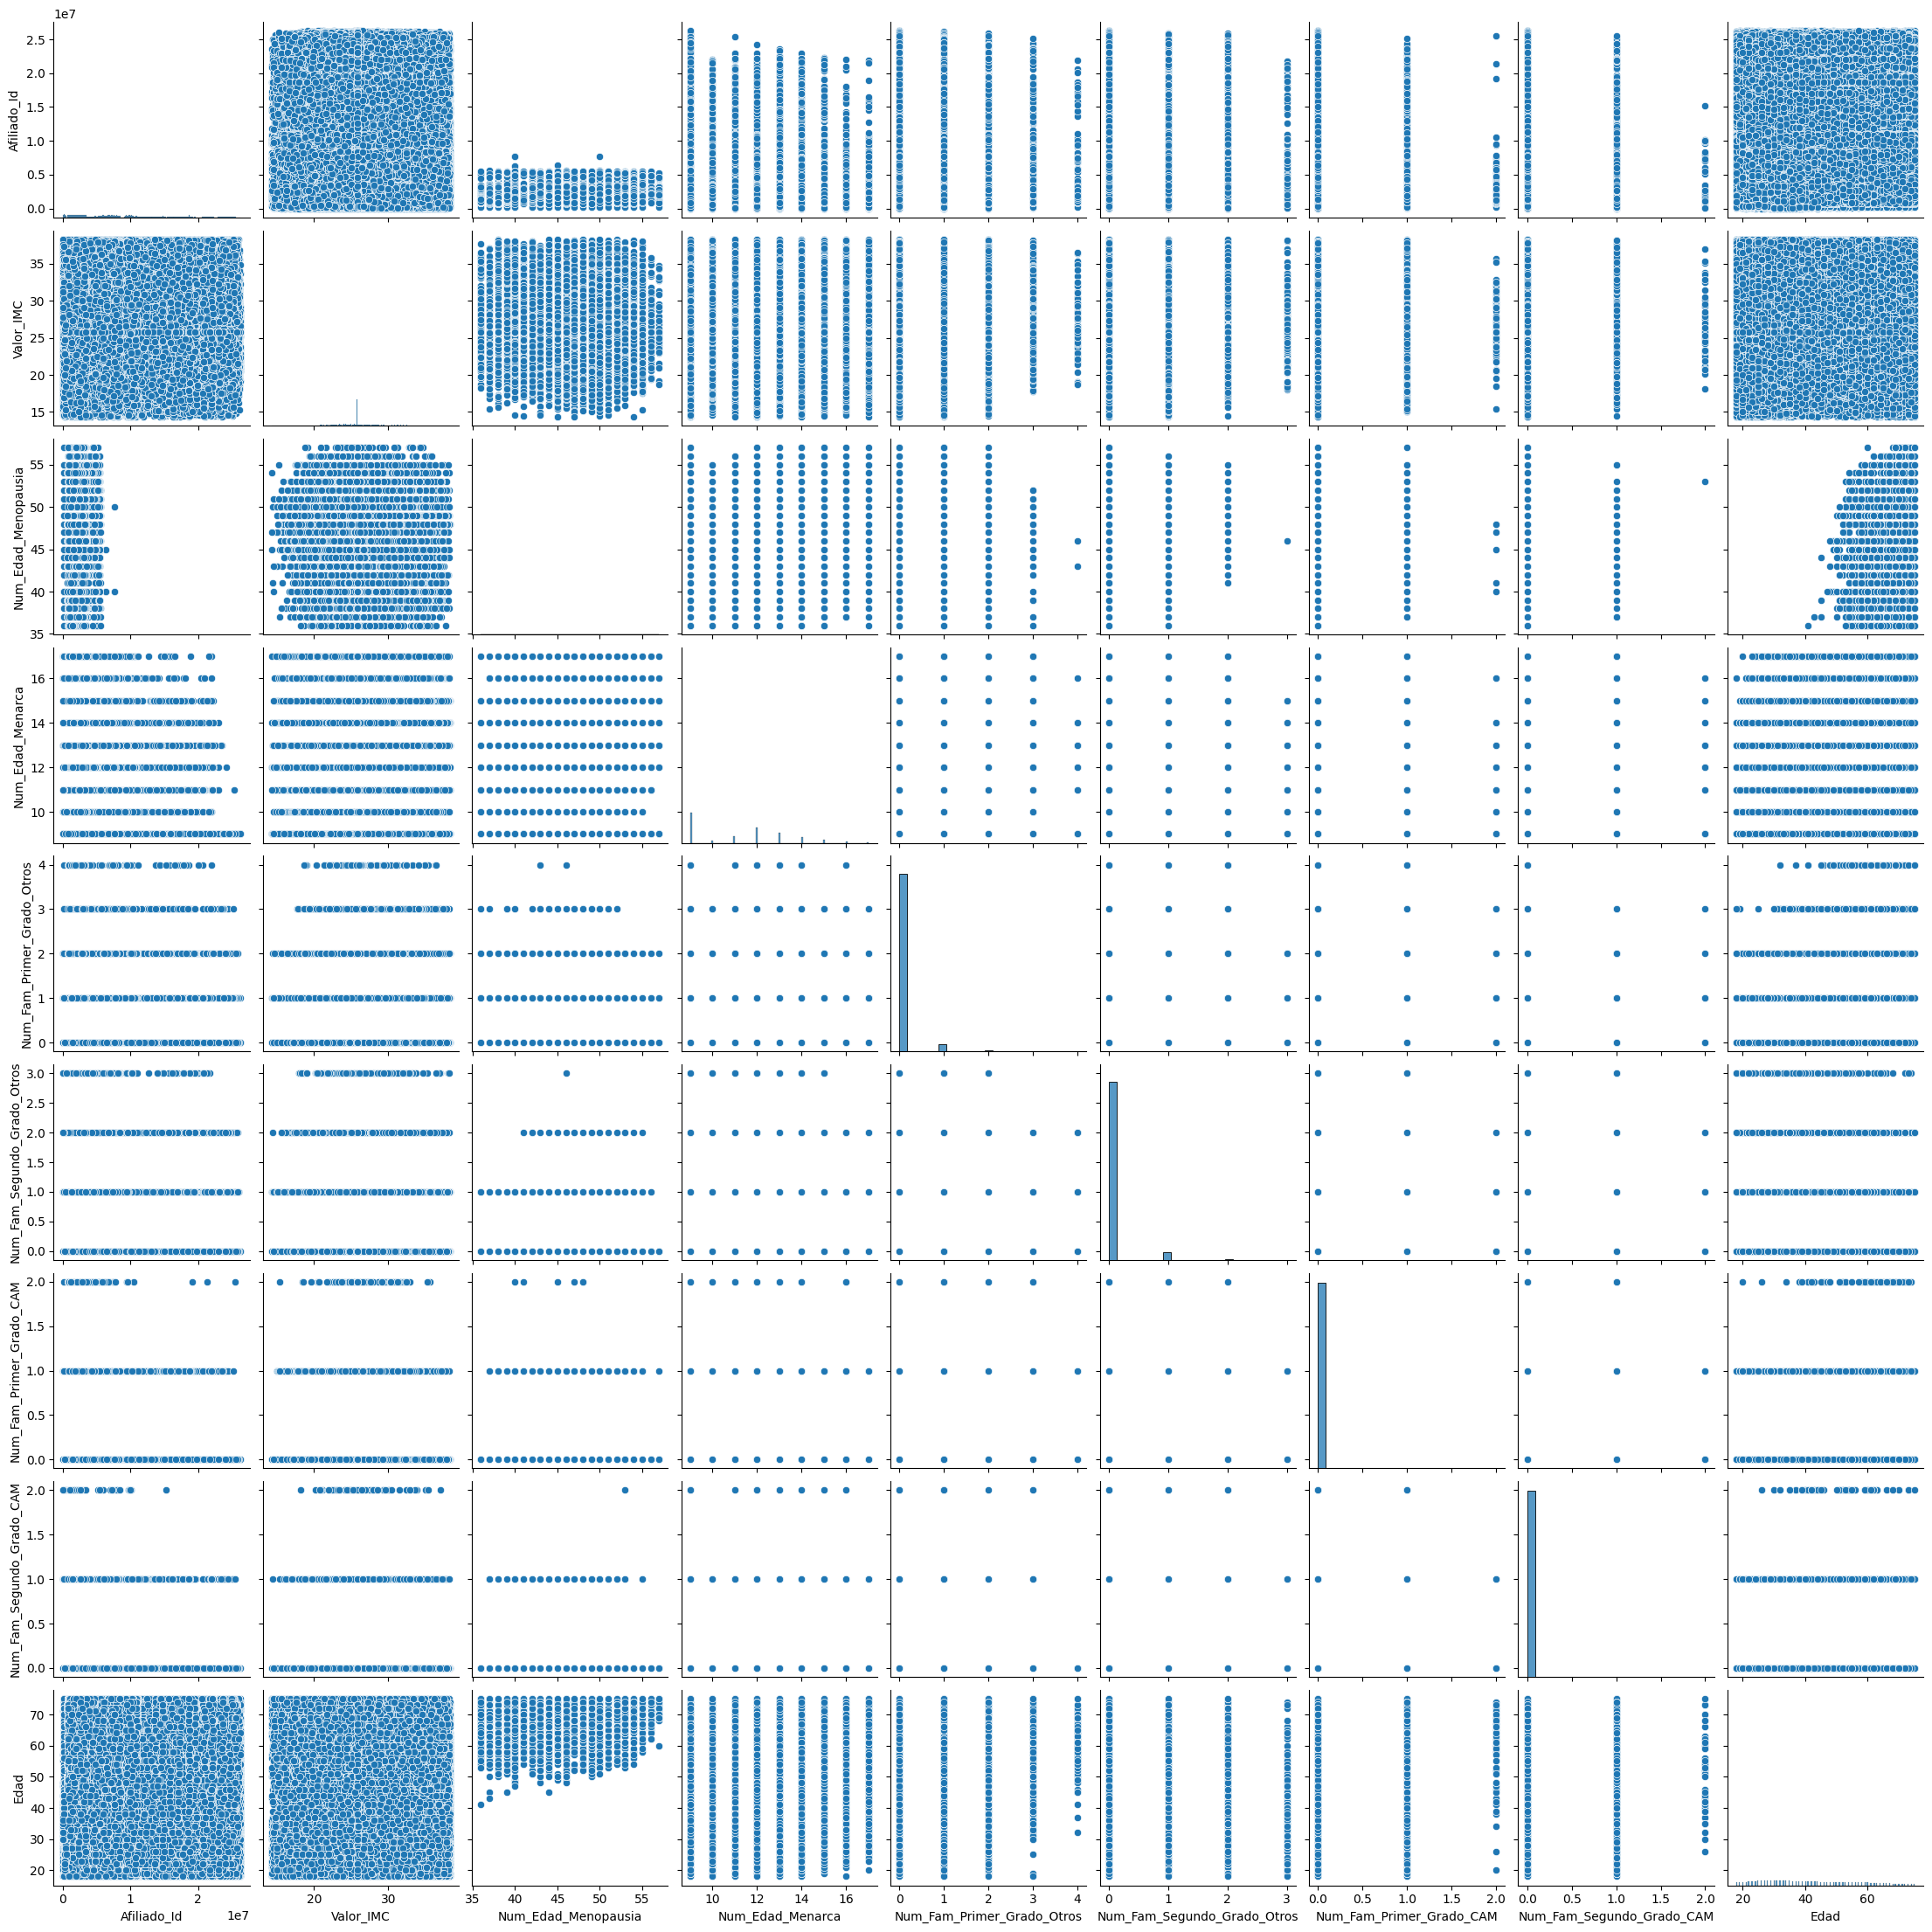

In [69]:
#Histogramas(diagonal principal de las tablas)
df1=data_raw.select_dtypes(exclude= 'object')
sns.pairplot(data = df1);

In [128]:
data_raw.replace({'Si': 1, 'No': 0}, inplace=True)

C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3849192398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_raw.replace({'Si': 1, 'No': 0}, inplace=True)
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3849192398.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_raw.replace({'Si': 1, 'No': 0}, inplace=True)
C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3849192398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer

In [133]:
data_corr = data_raw.copy()
data_corr = data_corr.drop(['Sexo_Cd', 'Afiliado_Id', 'Raza_Desc'], axis=1)

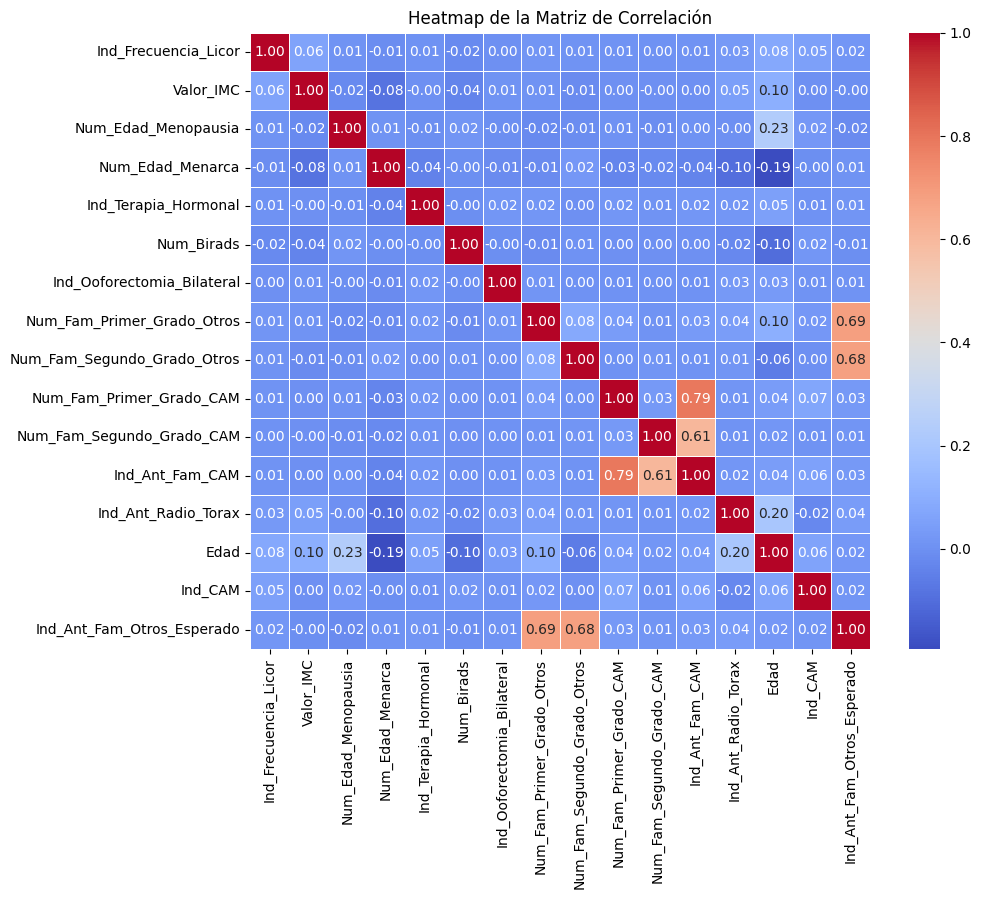

In [134]:
# Crear el heatmap
plt.figure(figsize=(10, 8))  # Tamaño del gráfico
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Personalizar etiquetas
plt.title("Heatmap de la Matriz de Correlación")
plt.show()

Se evidencia que hay relación lineal fuerte entre las variables de número de antecedentes familiares con las variables de indicadore de antecedentes familiares. Por lo tanto, la mejor opción es quedarse solo con la variable indicador de antecendes familiares.

In [135]:
#Analizar correlacion entre edad y edad de la menopausia
data_prep_edad = data_corr.dropna(subset=['Num_Edad_Menopausia'])
corr_pears_edad_menopausia = data_prep_edad['Edad'].corr(data_prep_edad['Num_Edad_Menopausia'])
corr_pears_edad_menopausia   

np.float64(0.23239399045036155)

# Preparación de los datos

Se hace una copia del DataFrame resultante del proceso de comprensión de los datos

In [136]:
data_prep = data_raw.copy()

## Selección de variables

In [139]:
data_prep.columns

Index(['Afiliado_Id', 'Ind_Frecuencia_Licor', 'Sexo_Cd', 'Raza_Desc',
       'Valor_IMC', 'Num_Edad_Menopausia', 'Num_Edad_Menarca',
       'Ind_Terapia_Hormonal', 'Num_Birads', 'Ind_Ooforectomia_Bilateral',
       'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Num_Fam_Primer_Grado_CAM', 'Num_Fam_Segundo_Grado_CAM',
       'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax', 'Edad', 'Ind_CAM',
       'Ind_Ant_Fam_Otros_Esperado'],
      dtype='object')

Se seleccionan las variables que se consideran pueden ser relevantes para el análisis. En este caso, se elimina la variable Sexo y afiliado_id inicialmente

In [178]:
data_prep.drop(['Sexo_Cd', 'Afiliado_Id'], axis=1, inplace=True)

## Limpieza de datos

### Manejo de datos faltantes

In [181]:
missing_values = data_prep.isnull().mean() * 100
print(missing_values)

Ind_Frecuencia_Licor           0.000000
Raza_Desc                     70.872747
Valor_IMC                     11.055880
Num_Edad_Menopausia           98.576210
Num_Edad_Menarca              59.428274
Ind_Terapia_Hormonal           0.000000
Num_Birads                    77.930153
Ind_Ooforectomia_Bilateral     0.000000
Num_Fam_Primer_Grado_Otros     0.000000
Num_Fam_Segundo_Grado_Otros    0.000000
Num_Fam_Primer_Grado_CAM       0.000000
Num_Fam_Segundo_Grado_CAM      0.000000
Ind_Ant_Fam_CAM                0.000000
Ind_Ant_Radio_Torax            0.000000
Edad                           0.000000
Ind_CAM                        0.000000
Ind_Ant_Fam_Otros_Esperado     0.000000
dtype: float64


Con respecto a los datos faltantes, se realiza el siguiente tratamiento:
- Ind_Frecuencia_Licor: Se imputa con la moda.
- Raza: Dado que según los estudios la raza con mayor riesgo es raza blanca, se decide categorizar dicha variable donde se deje 1 cuando sea raza blanca, 0 de lo contrario.
- Valor_IMC: Se decide imputar el valor con la mediana.
- Num_Edad_Menopausia: Se decide crear una variable que la reemplace por una variable categórica llamada Ind_Menopausia donde sea 1 cuando la edad sea mayor a 50 años, 0 en caso contrario.
- Num_Edad_Menarca: Se decide reemplazar por el valor de la mediana.
- Num_Birads: Se decide eliminar la variable dado que no hay una forma de imputarla con un criterio valido.

In [180]:
# Calcular la moda de la variable
moda_licor = data_prep['Ind_Frecuencia_Licor'].mode()[0]

# Imputar los valores faltantes con la moda
data_prep['Ind_Frecuencia_Licor'].fillna(moda_licor, inplace=True)

C:\Users\camil\AppData\Local\Temp\ipykernel_7700\636215244.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_prep['Ind_Frecuencia_Licor'].fillna(moda_licor, inplace=True)


In [183]:
# Añadir la categoría 'Desconocido' a 'Raza_Desc'
data_prep['Raza_Desc'] = data_prep['Raza_Desc'].cat.add_categories('Desconocido')

# Imputar los valores faltantes con 'Desconocido'
data_prep['Raza_Desc'].fillna('Desconocido', inplace=True)

# Crear la variable binaria Ind_Raza_Blanca
data_prep['Ind_Raza_Blanca'] = data_prep['Raza_Desc'].apply(lambda x: 1 if x == 'Blanca' else 0)

# Eliminar la variable original si ya no es necesaria
data_prep.drop(columns=['Raza_Desc'], inplace=True)

C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3579166328.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_prep['Raza_Desc'].fillna('Desconocido', inplace=True)


In [184]:
# Calcular la mediana de la variable
mediana_imc = data_prep['Valor_IMC'].median()

# Imputar los valores faltantes con la mediana
data_prep['Valor_IMC'].fillna(mediana_imc, inplace=True)

C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3206315116.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_prep['Valor_IMC'].fillna(mediana_imc, inplace=True)


In [185]:
# Crear la variable Ind_Menopausia basada en Edad
data_prep['Ind_Menopausia'] = data_prep['Edad'].apply(lambda x: 1 if x > 50 else 0)

In [186]:
# Calcular la mediana de la variable
mediana_menarca = data_prep['Num_Edad_Menarca'].median()

# Imputar los valores faltantes con la mediana
data_prep['Num_Edad_Menarca'].fillna(mediana_menarca, inplace=True)

C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3810451923.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_prep['Num_Edad_Menarca'].fillna(mediana_menarca, inplace=True)


In [187]:
# Eliminar la variable Num_Birads
data_prep.drop(columns=['Num_Birads'], inplace=True)

In [189]:
faltantes = data_prep.isnull().mean()
print("Valores faltantes después del tratamiento:")
print(faltantes)

Valores faltantes después del tratamiento:
Ind_Frecuencia_Licor          0.000000
Valor_IMC                     0.000000
Num_Edad_Menopausia           0.985762
Num_Edad_Menarca              0.000000
Ind_Terapia_Hormonal          0.000000
Ind_Ooforectomia_Bilateral    0.000000
Num_Fam_Primer_Grado_Otros    0.000000
Num_Fam_Segundo_Grado_Otros   0.000000
Num_Fam_Primer_Grado_CAM      0.000000
Num_Fam_Segundo_Grado_CAM     0.000000
Ind_Ant_Fam_CAM               0.000000
Ind_Ant_Radio_Torax           0.000000
Edad                          0.000000
Ind_CAM                       0.000000
Ind_Ant_Fam_Otros_Esperado    0.000000
Ind_Raza_Blanca               0.000000
Ind_Menopausia                0.000000
dtype: float64


### Tratamiento de outliers

En la comprensión de datos encontramos que el valor del IMC y la edad tenían valores atípicos. En este caso, se toman las siguientes decisiones.
- Valor_IMC: Reemplazar los outliers con la mediana.
- Para edad: Dado que el objetivo de estudio es para mujeres hasta los 75 años, se eliminan los registros con una edad superior.

In [191]:
# Paso 1: Identificar valores faltantes y outliers

# Calcular el rango intercuartílico (IQR)
Q1 = data_prep['Valor_IMC'].quantile(0.25)  # Primer cuartil
Q3 = data_prep['Valor_IMC'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 2: Calcular la mediana sin incluir los outliers
filtered_data = data_prep[(data_prep['Valor_IMC'] >= lower_bound) & (data_prep['Valor_IMC'] <= upper_bound)]
median_no_outliers = filtered_data['Valor_IMC'].median()

print(f"Mediana de 'Valor_IMC' sin outliers: {median_no_outliers}")

# Paso 3: Reemplazar valores faltantes y outliers con la mediana calculada

# Función para reemplazar valores
def replace_outliers_and_missing(value):
    if pd.isnull(value) or value < lower_bound or value > upper_bound:
        return median_no_outliers
    return value


Mediana de 'Valor_IMC' sin outliers: 25.96454217209623


In [192]:
# Aplicar la función a la columna Valor_IMC
data_prep['Valor_IMC'] = data_prep['Valor_IMC'].apply(replace_outliers_and_missing)

In [193]:
# Eliminar registros con edad mayor a 75 años
data_prep = data_prep[data_prep.Edad <= 75]

## Construcción de datos

### Ingeniería de características

Se decide crear la variable tiempo de exposición hormonal, la cual tiene los siguientes criterios:
    
    Caso 1:
        Condición: Edad < 50 años y no tiene dato en Num_Edad_Menopausia.
        Cálculo: Tiempo_Exposicion_Hormonal = Edad - Num_Edad_Menarca.

    Caso 2:
        Condición: Tiene datos tanto en Num_Edad_Menopausia como en Num_Edad_Menarca.
        Cálculo: Tiempo_Exposicion_Hormonal = Num_Edad_Menopausia - Num_Edad_Menarca.

    Caso 3:
        Condición: Edad > 50 años y no tiene dato en Num_Edad_Menopausia.
        Cálculo: Tiempo_Exposicion_Hormonal = 50 - Num_Edad_Menarca.

In [197]:
# 1. Verificar que las variables necesarias existen en el DataFrame
variables_necesarias = ['Edad', 'Num_Edad_Menarca', 'Num_Edad_Menopausia']
for var in variables_necesarias:
    if var not in data_prep.columns:
        raise ValueError(f"La variable '{var}' no está en el DataFrame.")

# 2. Crear condiciones para cada caso
# Caso 1: Edad < 50 y Num_Edad_Menopausia es NaN
condicion1 = (data_prep['Edad'] < 50) & (data_prep['Num_Edad_Menopausia'].isnull()) & (data_prep['Num_Edad_Menarca'].notnull())

# Caso 2: Num_Edad_Menopausia y Num_Edad_Menarca no son NaN
condicion2 = (data_prep['Num_Edad_Menopausia'].notnull()) & (data_prep['Num_Edad_Menarca'].notnull())

# Caso 3: Edad > 50 y Num_Edad_Menopausia es NaN
condicion3 = (data_prep['Edad'] > 50) & (data_prep['Num_Edad_Menopausia'].isnull()) & (data_prep['Num_Edad_Menarca'].notnull())

# 3. Definir los cálculos correspondientes
calculo1 = data_prep['Edad'] - data_prep['Num_Edad_Menarca']
calculo2 = data_prep['Num_Edad_Menopausia'] - data_prep['Num_Edad_Menarca']
calculo3 = 50 - data_prep['Num_Edad_Menarca']

# 4. Aplicar los cálculos usando np.select
data_prep['Tiempo_Exposicion_Hormonal'] = np.select(
    condlist=[condicion1, condicion2, condicion3],
    choicelist=[calculo1, calculo2, calculo3],
    default=np.nan  # Valor por defecto si no se cumple ninguna condición
)

# Opcional: Revisar estadísticas de la nueva variable
print(data_prep['Tiempo_Exposicion_Hormonal'].describe())
# 5. Verificar los resultados
data_prep[['Edad', 'Num_Edad_Menarca', 'Num_Edad_Menopausia', 'Tiempo_Exposicion_Hormonal']].head()



count   2070000.000000
mean         27.064589
std          10.633228
min           2.000000
25%          18.000000
50%          28.000000
75%          38.000000
max          48.000000
Name: Tiempo_Exposicion_Hormonal, dtype: float64


C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3832154998.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prep['Tiempo_Exposicion_Hormonal'] = np.select(


,Edad,Num_Edad_Menarca,Num_Edad_Menopausia,Tiempo_Exposicion_Hormonal
0,34,13.000000,NaN,21.000000
1,40,14.000000,NaN,26.000000
2,41,11.000000,NaN,30.000000
3,25,11.000000,NaN,14.000000
4,61,9.000000,NaN,41.000000


Ahora, se considera agregar una variable categorica según el valor del IMC:
- Bajo peso: IMC < 18.5
- Normal: 18.5 ≤ IMC < 25
- Sobrepeso: 25 ≤ IMC < 30
- Obesidad: IMC ≥ 30

In [198]:
# 1. Verificar que 'Valor_IMC' no tiene valores faltantes
# (Según la preparación previa, ya se imputaron los faltantes con la mediana)
print(data_prep['Valor_IMC'].isnull().sum())  # Debería ser 0

# 2. Definir los bins y etiquetas para las categorías de IMC
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad']

# 3. Crear la variable categórica 'Categoria_IMC'
data_prep['Categoria_IMC'] = pd.cut(
    data_prep['Valor_IMC'],
    bins=bins,
    labels=labels,
    right=False  # Incluye el límite izquierdo y excluye el derecho
)

# 4. Verificar la creación de la nueva variable
print(data_prep[['Valor_IMC', 'Categoria_IMC']].head())

# 5. Revisar la distribución de las categorías
print(data_prep['Categoria_IMC'].value_counts())

0
   Valor_IMC Categoria_IMC
0  29.010000     Sobrepeso
1  25.964542     Sobrepeso
2  33.010000      Obesidad
3  23.340000        Normal
4  24.670000        Normal
Categoria_IMC
Sobrepeso    1012874
Normal        732883
Obesidad      325668
Bajo peso      29941
Name: count, dtype: int64


C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3895973897.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prep['Categoria_IMC'] = pd.cut(


In [199]:
data_prep.drop('Num_Edad_Menopausia', axis=1, inplace=True)

C:\Users\camil\AppData\Local\Temp\ipykernel_7700\3593179679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prep.drop('Num_Edad_Menopausia', axis=1, inplace=True)


### Estandarizar variables númericas

In [200]:
data_prep.columns

Index(['Ind_Frecuencia_Licor', 'Valor_IMC', 'Num_Edad_Menarca',
       'Ind_Terapia_Hormonal', 'Ind_Ooforectomia_Bilateral',
       'Num_Fam_Primer_Grado_Otros', 'Num_Fam_Segundo_Grado_Otros',
       'Num_Fam_Primer_Grado_CAM', 'Num_Fam_Segundo_Grado_CAM',
       'Ind_Ant_Fam_CAM', 'Ind_Ant_Radio_Torax', 'Edad', 'Ind_CAM',
       'Ind_Ant_Fam_Otros_Esperado', 'Ind_Raza_Blanca', 'Ind_Menopausia',
       'Tiempo_Exposicion_Hormonal', 'Categoria_IMC'],
      dtype='object')

In [207]:
scaler = MinMaxScaler()
data_prep[['Valor_IMC', 'Edad', 'Tiempo_Exposicion_Hormonal']] = scaler.fit_transform(data_prep[['Valor_IMC', 'Edad', 'Tiempo_Exposicion_Hormonal']])

C:\Users\camil\AppData\Local\Temp\ipykernel_7700\1021775704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prep[['Valor_IMC', 'Edad', 'Tiempo_Exposicion_Hormonal']] = scaler.fit_transform(data_prep[['Valor_IMC', 'Edad', 'Tiempo_Exposicion_Hormonal']])


## Formateo de datos